In [1]:
import json
import pprint
import pandas as pd
import numpy as np
import os
import subprocess
import pexpect
import sys
import time
import tldextract
import re
import pickle
import urllib.request 

In [2]:
usuarioBlackbird = 'joaomcouto'
senhaBlackbird = 'oJ@o55'
filesBlackbird = [#'/scratch4/leandro/data/fn/pickles/top-10-perserver-20210817.csv',
                  '/scratch4/leandro/data/fn/pickles/top-10-perserver-20210825.csv',
                   '/scratch4/leandro/data/fn/compiled_trusty_news_portals.txt',
                   '/scratch4/leandro/data/fn/url2title.csv']
filesHttp = ['https://www.domcop.com/files/top/top10milliondomains.csv']
destinationLocal = './data/'

In [3]:
#Baixa os arquivos listados em filesBlackbird APENAS SE já não estiverem no diretorio /data
for file in filesBlackbird:
    if not os.path.isfile('data/' + file.split('/')[-1]):
        child = pexpect.spawn("bash")
        child.timeout= 300
        child.sendline("scp -P2512 -r " +
                              usuarioBlackbird+
                              "@blackbird.dcc.ufmg.br:"+
                              file+ 
                              " "+
                             destinationLocal)
        child.logfile_read = sys.stdout
        child.expect("password:")
        child.sendline(senhaBlackbird)
        child.expect("100%")
        
        time.sleep(2)
        child.close() 
        time.sleep(2)

In [4]:
for file in filesHttp:
    if not os.path.isfile('data/' + file.split('/')[-1]):
        urllib.request.urlretrieve(file, "./data/" + file.split('/')[-1] )

In [5]:
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_rows', 200)
def dataframe_summary(df):
    print(df.shape)
    print(df.describe())
    print("\n")
    print(df.info())
    return df.head(100)
    
def dataframe_sample(dfaa):
    return dfaa.sample(n=10).head(30)

In [6]:
#Carrega as URLs das 10 noticias mais compartilhadas dos sites de baixa credibilidade em um dataframe
dfUrlFalse = pd.read_csv('data/top-10-perserver-20210825.csv', delimiter='|')

urlFalseManualRemoval = ['constantcontact.com','paper.li','google.com','googleusercontent.com','apnews.com','imrworldwide.com']
dfUrlFalse = dfUrlFalse.drop(dfUrlFalse[dfUrlFalse['url'].str.contains('|'.join(urlFalseManualRemoval))].index)



#Temporario emergencia MPMG
# with open("content_features/dados/NoticiasFiltradas/filtradas_fake_titles.txt") as f:
#     news_dict = []
#     for news in f:
#         news_dict.append(json.loads(news))
#     dfUrlFalse = pd.DataFrame.from_dict(news_dict)

In [7]:
dataframe_summary(dfUrlFalse)

(2017, 3)
            amount
count  2017.000000
mean     54.358453
std     109.404430
min       1.000000
25%       8.000000
50%      23.000000
75%      60.000000
max    2910.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2043
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   server  2017 non-null   object
 1   url     2017 non-null   object
 2   amount  2017 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 63.0+ KB
None


,server,url,amount
0,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/31794/urgente-comandantes-do-alto-patamar-das-forcas-armadas-se-unem-e-lancam-forte-nota-contra-o-tse-equottem-algo-a-esconderequot,592
1,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/16821/a-pec-que-extingue-a-pec-da-bengala-ja-esta-na-ccj-e-hora-da-sociedade-agir,512
2,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/15866/governo-zera-tarifas-de-importacao-para-medicamentos-contra-cancer-e-hiv,498
3,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/31511/grave-randolfe-convoca-equotexercito-de-stedileequot-o-mst-para-derrubar-bolsonaro-veja-o-video,493
4,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/31713/avante-a-mentira-jamais-sobrepujou-a-verdade,476
5,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/13444/gasolina-cai-pelo-terceiro-mes-consecutivo-e-inflacao-de-fevereiro-e-a-menor-desde-o-plano-real,461
6,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/31382/urgente-advogado-de-daniel-silveira-rompe-o-silencio-lanca-dura-nota-e-dispara-equotmoraes-esta-interferindo-na-camara-e-na-pgrequot,441
7,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/10218/finalmente-alguem-escreveu-aquilo-que-todos-que-acreditam-em-lula-precisam-conhecer,432
8,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/14804/confianca-e-tudo-scania-hyundai-gm-carrefour-e-honda-anunciam-investimentos-no-brasil,422
9,jornaldacidadeonline.com.br,https://www.jornaldacidadeonline.com.br/noticias/14580/o-parlamento-e-a-causa-da-corrupcao-e-nao-a-consequencia,421


In [8]:
dataframe_sample(dfUrlFalse)

,server,url,amount
255,mblnews.org,https://mblnews.org/noticia/militar-detido-com-39-quilos-de-cocaina-ja-fez-voos-com-dilma-e-temer/,90
867,plantaobrasil.net,http://ln.is/plantaobrasil.net/kHf95,1
1523,coletividade-evolutiva.com.br,https://www.coletividade-evolutiva.com.br/2018/11/vacinas-estao-com-virus-mortal-sendo-inoculados-em-humanos.html,30
1582,revistatercalivre.com.br,https://revistatercalivre.com.br/app/noticias-suplementares/rodrigo-maia-espalha-fake-news-sobre-abraham-weintraub__76,54
1879,noticiasdahora.com.br,https://noticiasdahora.com.br/index.php/politica/5879-apenas-dois-parlamentares-da-bancada-do-acre-votam-contra-o-aumento-do-fundo-eleitoral.html,2
1002,ramblalibre.com,http://ramblalibre.com/2020/09/01/manifiesto-por-la-republica-constitucional/,28
1450,jornal316.com.br,https://www.jornal316.com.br/2019/12/stf-derruba-fim-do-dpvat-e-de-fato-nao.html,97
1255,ejercicios.mercola.com,http://ejercicios.mercola.com/sitios/ejercicios/archivo/2014/11/28/las-sentadillas-perfectas.aspx,14
126,articles.mercola.com,http://articles.mercola.com/sites/articles/archive/2014/07/16/top10-nutritional-myths.aspx,47
1138,mpr21.info,https://mpr21.info/el-gobierno-britanico-recula-ante-los-pasaportes-de-vacunas/,21


In [9]:
#Carrega os csv com valores de ranking e pageRank do 10million websites
dfTenMill = pd.read_csv('data/top10milliondomains.csv', delimiter=',')

In [10]:
dataframe_summary(dfTenMill)

(10000000, 3)
               Rank  Open Page Rank
count  1.000000e+07    1.000000e+07
mean   5.000000e+06    3.025613e+00
std    2.886751e+06    5.204848e-01
min    1.000000e+00    2.440000e+00
25%    2.500001e+06    2.610000e+00
50%    5.000000e+06    2.850000e+00
75%    7.500000e+06    3.340000e+00
max    1.000000e+07    1.000000e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Rank            int64  
 1   Domain          object 
 2   Open Page Rank  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.9+ MB
None


,Rank,Domain,Open Page Rank
0,1,facebook.com,10.00
1,2,fonts.googleapis.com,10.00
2,3,twitter.com,10.00
3,4,google.com,10.00
4,5,youtube.com,10.00
5,6,s.w.org,10.00
6,7,instagram.com,10.00
7,8,googletagmanager.com,10.00
8,9,linkedin.com,10.00
9,10,ajax.googleapis.com,10.00


In [11]:
#Carrega e pre-processa os dominios de alta credibilidade COMO LISTADO na anj https://www.anj.org.br/associados/)
#O pre-processamento consiste em:
    #(1) Pra cada listagem, transforma em subdominio.dominio.sufixo
          #Ou seja, 
          #bbc.com/portuguese vira bbc.com
          #theintercept.com/brasil/ vira theintercept.com
          #uol.com.br/ vira uol.com.br
    #(NOT ANYMORE) Para listagens que tem subdominio e.g. g1.globo.com (g1 é subdominio) adiciona o dominio à lista de confiaveis
          #Ou seja, 
          #além de valor.globo.com teremos tambem globo.com na lista de fonte confiaveis
    #(2) Ordena a lista e retira duplicatas
          #A lista original da ANJ já vem com redundancias e.g. uol.com.br e uol.com.br/

with open('data/compiled_trusty_news_portals.txt', 'r') as file :
    filedata = file.readlines()

#extraMainTrustyDomains = []
for i,dom in enumerate(filedata):
    ext = tldextract.extract(dom)
    
    if(len(ext.subdomain)>0):
        filedata[i] = ext.subdomain + "." + ext.domain +'.'+ ext.suffix + "\n"
        #extraMainTrustyDomains.append(ext.domain +'.'+ ext.suffix + "\n")
    else:
        filedata[i] = ext.domain +'.'+ ext.suffix + "\n"
            
filedata = filedata #+ extraMainTrustyDomains
filedata = sorted(list(set(filedata)))
    

with open('data/compiled_trusty_news_portals.txt', 'w') as file:
    file.write("".join(filedata))

trustyNewsDomains_ = open("data/compiled_trusty_news_portals.txt", "r")
trustyNewsDomains = pd.DataFrame([x.strip() for x in trustyNewsDomains_.readlines()], columns=['url'])

#Retira sites indesejados
trustyUndesirables = ['nytimes', 'bbc','terra', 'intercept'] 
trustyNewsDomains = trustyNewsDomains.drop(trustyNewsDomains[trustyNewsDomains['url'].str.contains('|'.join(trustyUndesirables))].index)
trustyNewsDomains = trustyNewsDomains.reset_index(drop=True)


In [12]:
dataframe_summary(trustyNewsDomains)

(98, 1)
                  url
count              98
unique             98
top     acidadeon.com
freq                1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     98 non-null     object
dtypes: object(1)
memory usage: 912.0+ bytes
None


,url
0,acidadeon.com
1,acritica.com
2,agazetaderondoniadigital.com
3,agorarn.com.br
4,an.com.br
5,atarde.com.br
6,atribuna.com.br
7,avozdacidade.com
8,bopaper.com.br
9,correio24horas.com.br


In [13]:
#Carrega a coluna URL do csv com todas as URLs expandidas pelo leandro e 
    #pre-processa para pegar apenas as URLs de sites de alta credibilidade
    
#O pre-processamento consiste em
     #(1) Consertar erros no csv: substitui aspas duplas por simples 
     #(2) Pega as URLs cujo dominio ou subdominio estão na lista da ANJ AMPLIADA conforme descrito acima

with open('data/url2title.csv', 'r') as file :
    filedata = file.read()
filedata = filedata.replace('"', "'")
with open('data/url2title.csv', 'w') as file:
    file.write(filedata)

dfUrlTrue_ = pd.read_csv('data/url2title.csv', delimiter=',', engine='python', usecols=['url'])

dfUrlTrue =[]
for x in list(dfUrlTrue_['url']):
    try:
        ext = tldextract.extract(x)
    except Exception as e:
        #print("Deu excessao no x:", x , "\n")
        continue
    if(ext.domain +'.'+ ext.suffix in list(trustyNewsDomains['url'])):
        dfUrlTrue.append(x)
    elif(ext.subdomain + "." + ext.domain +'.'+ ext.suffix in list(trustyNewsDomains['url'])):
        dfUrlTrue.append(x)
        
dfUrlTrue = pd.DataFrame(dfUrlTrue, columns = ['url'])

#Retira urls com substrings indesejadas
urlTrueUndesirables = ['.jpg','index.php','/tag/', '/tudo-sobre/', '/especiais/','/editoria/'] 
dfUrlTrue = dfUrlTrue.drop(dfUrlTrue[dfUrlTrue['url'].str.contains('|'.join(map(re.escape,urlTrueUndesirables)))].index)
dfUrlTrue = dfUrlTrue.reset_index(drop=True)


indexesToDrop = []
for index, row in dfUrlTrue.iterrows():
    url = row['url']
    ext = tldextract.extract(url)
    
    #Retira urls cujo path não tem pelo menos um subdiretorio x tal que /x/ seja composto por letras E numeros. 
    # Se todos forem apenas letras ou apenas numeros a url é eliminada
    try:
        pathList = url.split(ext.suffix + '/')[1].split('/')
    except Exception as e:
        indexesToDrop.append(index)
        continue
        #print("Deu excessao na url:" , url)
        #print(sys.exc_info()[2])
        
    onlyAlphaOrOnlyDigitCount = 0
    for subdir in pathList:
        if(subdir.isdigit() or subdir.isalpha()):
            onlyAlphaOrOnlyDigitCount += 1
    if(url[-1]=='/'):
        if(onlyAlphaOrOnlyDigitCount==len(pathList)-1):
            indexesToDrop.append(index)
            continue
    else:
        if(onlyAlphaOrOnlyDigitCount==len(pathList)):
            indexesToDrop.append(index)
            continue
            
    #Retira urls que são apenas o proprio site     
    if (url.endswith((ext.suffix, ext.suffix + "/"))):
        if(index not in indexesToDrop):
            indexesToDrop.append(index)
        
dfUrlTrue = dfUrlTrue.drop(indexesToDrop)
dfUrlTrue = dfUrlTrue.reset_index(drop=True)

dfUrlTrue = dfUrlTrue.sample(n=10000, random_state=10)

#Temporario emergencia MPMG
# with open("content_features/dados/NoticiasFiltradas/filtradas_true_titles.txt") as f:
#     news_dict = []
#     for news in f:
#         news_dict.append(json.loads(news))
#     dfUrlTrue  = pd.DataFrame.from_dict(news_dict)



In [14]:
dataframe_summary(dfUrlTrue)

(10000, 1)
                                                                                    url
count                                                                             10000
unique                                                                            10000
top     https://www.gazetadopovo.com.br/pino/marcas-curitibana-design-sustentabilidade/
freq                                                                                  1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 85097 to 96621
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB
None


,url
85097,https://www.gazetadopovo.com.br/pino/marcas-curitibana-design-sustentabilidade/
99340,https://www.gazetadopovo.com.br/vida-publica/sob-inspiracao-nazista-getulio-inventou-o-carnaval-brasileiro-a64fpn1ovrutmeepdb7jo18bk
3039,https://www.atribuna.com.br/variedades/gamestecnologia/preconceito-com-games-brasileiros-afeta-consumo-na-baixada-santista
12336,https://www.folhavitoria.com.br/publicidade-legal/page/21/
78146,https://www.folhavitoria.com.br/geral/blogs/empregoseconcursos/2017/11/16/sedu-lanca-edital-para-professores-de-pedagogos/
126907,https://www.atribuna.com.br/cidades/santos/santos-tera-evento-com-oportunidades-de-emprego-na-vila-progresso
66273,https://www.folhape.com.br/cultura/dandara-mariana-se-classifica-para-semifinal-da-super-danca-dos/187053/
12906,https://www.folhape.com.br/esportes/com-anuncio-bem-humorado-sport-oficializa-contratacao-de-everton/192698/
52326,https://www.folhavitoria.com.br/geral/blogs/direito-ao-direito/2020/06/09/a-praga-do-racismo/
148912,https://www.correio24horas.com.br/noticia/nid/12-lugares-com-atendimento-odontologico-gratuito-ou-mais-barato-em-salvador/


In [15]:
dataframe_sample(dfUrlTrue)

,url
58709,https://www.uol.com.br/esporte/olimpiadas/ultimas-noticias/2021/07/30/cesar-cielo-recorde-50m-livre.htm
132529,https://www.uol.com.br/splash/amp-stories/sextou-com-nova-do-the-weeknd-pericao-no-rap-e-sofrencia-funk/
54140,https://www.jcam.com.br/noticias/robo-do-tce-am-fez-mais-de-5-mil-atendimentos-em-2-meses/
36100,https://g1.globo.com/rj/rio-de-janeiro/noticia/2021/04/07/memorias-seguem-intactas-diz-sobrevivente-10-anos-apos-massacre-de-realengo-em-escola-do-rio.ghtml
1654,https://www.correiobraziliense.com.br/cidades-df/2021/08/4941754-secretario-de-obras-do-df-diz-que-area-verde-do-sudoeste-nao-sera-removida.html
26253,https://www.uol.com.br/universa/colunas/ana-canosa/2021/06/17/escolhi-esperar-podia-focar-em-educacao-sexual-nao-no-controle-de-jovens.htm
52106,https://www.correio24horas.com.br/noticia/nid/bahia-vai-receber-mais-de-172-mil-doses-de-vacinas-contra-covid-esta-semana/
64346,https://www.correio24horas.com.br/noticia/nid/banhistas-curtem-o-sol-em-praias-improprias-para-banho/
58970,https://www.uol.com.br/esporte/futebol/ultimas-noticias/gazeta-esportiva/2021/05/31/pirani-valoriza-broncas-de-diniz-no-santos-gosta-muito-de-mobilidade.htm
54468,https://www.jcam.com.br/noticias/nao-esta-tudo-normal/


In [16]:
from source_features.source_features import SourceFeaturesExtractor

In [17]:
sourceExtractor = SourceFeaturesExtractor("8c4b00a0873a12e53b7a2384ad8eeb9f")

/home/joaomcouto/git/E02_features/source_features/drivers/chromedriver


In [18]:
#Eu to deixando essa seção aqui pra testar rapidamente modificações no calculo das features..
#Na hora da coleta tu sempre descobre algo que ta fazendo errado ou pode melhorar

#url = "https://www.correiodopovo.com.br/"
    
# data_ipstack = sourceExtractor.get_ipstack_data(url)
# print(data_ipstack)
# print("\n")

# data_asn = sourceExtractor.get_asn_data(data_ipstack['subdomain_ip'])
# print(data_asn)
# print("\n")

# data_meta = sourceExtractor.get_ip_vs_asn_data(data_asn, data_ipstack)
# print(data_meta)
# print("\n")

# data_network = sourceExtractor.get_network_data(url)
# print(data_network)
# print("\n")

#url='https://horabrasilia.com.br/'
#data_ranking = sourceExtractor.get_ranking_data(url, dfTenMill)
#print(data_ranking)
#print("\n")

#data_registry = sourceExtractor.get_registry_data(url)
#print(data_registry)
#print("\n")

In [19]:
sourceColumns = [
                   'subdomain_ip', 'subdomain_ip_cc','subdomain_ip_is_brazil','subdomain_ip_is_us',
                   'subdomain_ip_latitude','subdomain_ip_longitude',
                   'subdomain_as_n','subdomain_as_cc',
                   'subdomain_ipcc_equal_ascc',
                   'domain_route_hops','domain_dns_caa_txt_count'
                 ]

In [20]:
dfSourceFeatures = pd.DataFrame(columns = ['desinformacao_label', 'url'] + sourceColumns)

In [21]:
#Criando esse df a mais pq muitas urls compartilham as mesmas source features ja que sao do mesmo site
#é imperativo: as features em data_network demoram 1 minuto POR INSTANCIA para serem coletadas
    #300mil minutos recalculando vs 400 minutos reutilizando
    
#SE ALGO MUDAR NAS FEATURES TEM QUE RERODAR DO ZERO, NAO INVENTA MODA SETA PRA NULL    
latest_subdomainSourceFeaturesPkl = 'NULL'

if os.path.isfile(latest_subdomainSourceFeaturesPkl):
    dfSubdomainSourceFeatures = pd.read_pickle(latest_subdomainSourceFeaturesPkl)
else:  
    dfSubdomainSourceFeatures = pd.DataFrame(columns = ['desinformacao_label','subdomain'] + sourceColumns)

In [22]:
import logging

In [23]:
def generate_source_features(dfUrlX, desinformacao_label, logFile):
    newSubdomainCount = 0
    begin = time.time()
    
    LOG_FILENAME =  'logSourceFeatures' + logFile + '.log'
    logging.basicConfig(filename=LOG_FILENAME, filemode ='a',level=logging.WARNING)
    count = 0
    for index, row in dfUrlX.iterrows():
            count +=1
            print("Elapsed time: ", time.time() - begin, count,"/",len(dfUrlX))

        #Esse if ta aqui só pra não calcular pra todos os dados o tempo todo enquanto desenvolvia o nb
        #Só comentar esse if pra percorrer todas as URLs calculando features
        #if(index < 50):
            url = row['url']
#             with open(LOG_FILENAME) as myfile:
#                 if url in myfile.read():
#                     continue
            dissectedUrl = tldextract.extract(url)
            subdomain = '.'.join(part for part in dissectedUrl if part)

            #print("Url:", url)
            #print("subdomain:", subd)

            dfSourceFeatures.at[len(dfSourceFeatures),'desinformacao_label'] = desinformacao_label
            dfSourceFeatures.at[len(dfSourceFeatures)-1,'url'] = url

            if(subdomain in list(dfSubdomainSourceFeatures['subdomain'])):
                features = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['subdomain'] == subdomain][0:1]
                for col in sourceColumns:
                    dfSourceFeatures.at[len(dfSourceFeatures)-1,col] = features[0:1][col].values[0]
            else:
                
                newSubdomainCount += 1
                print("Coletando dominio inedito:", subdomain, "#",newSubdomainCount)
               
                try:
                    #IPStack data vai ser calculado em cima do subdominio
                    row_data_ipstack = sourceExtractor.get_ipstack_data(url)
                    #ASN data vai ser calculado em cima do IP encontrado do SUBDOMINIO (IP de g1.globo.com e não globo.com)
                    row_data_asn = sourceExtractor.get_asn_data(row_data_ipstack['subdomain_ip'])
                    row_data_meta = sourceExtractor.get_ip_vs_asn_data(row_data_asn, row_data_ipstack)
                    #Network data vai ser calculado em cima do DOMINIO (globo.com e não g1.globo.com)
                    row_data_network = sourceExtractor.get_network_data(url)


                    mergedDict = {**row_data_ipstack, **row_data_asn, **row_data_network,**row_data_meta}
                    dfSubdomainSourceFeatures.at[len(dfSubdomainSourceFeatures),'desinformacao_label'] = desinformacao_label
                    dfSubdomainSourceFeatures.at[len(dfSubdomainSourceFeatures)-1,'subdomain'] = subdomain

                    for col in sourceColumns:
                        dfSourceFeatures.at[len(dfSourceFeatures)-1,col] = mergedDict[col]
                        dfSubdomainSourceFeatures.at[len(dfSubdomainSourceFeatures)-1,col] = mergedDict[col]
                except Exception as e:
                    logging.exception(url)
                
                

In [24]:
generate_source_features(dfUrlTrue,0,'urlTrue')

Elapsed time:  0.00045108795166015625 1 / 10000
Coletando dominio inedito: www.gazetadopovo.com.br # 1
Elapsed time:  71.80153322219849 2 / 10000
Elapsed time:  71.819411277771 3 / 10000
Coletando dominio inedito: www.atribuna.com.br # 2
Elapsed time:  128.4410924911499 4 / 10000
Coletando dominio inedito: www.folhavitoria.com.br # 3
Elapsed time:  202.4215703010559 5 / 10000
Elapsed time:  202.42933225631714 6 / 10000
Elapsed time:  202.43372297286987 7 / 10000
Coletando dominio inedito: www.folhape.com.br # 4
Elapsed time:  276.84342336654663 8 / 10000
Elapsed time:  276.8507750034332 9 / 10000
Elapsed time:  276.8551604747772 10 / 10000
Coletando dominio inedito: www.correio24horas.com.br # 5
Elapsed time:  342.7713005542755 11 / 10000
Elapsed time:  342.7782874107361 12 / 10000
Coletando dominio inedito: www.folhadaregiao.com.br # 6
Elapsed time:  417.3896791934967 13 / 10000
Elapsed time:  417.39651131629944 14 / 10000
Elapsed time:  417.4014205932617 15 / 10000
Coletando dominio 

Elapsed time:  1667.5965156555176 204 / 10000
Elapsed time:  1667.5993793010712 205 / 10000
Elapsed time:  1667.6038613319397 206 / 10000
Elapsed time:  1667.6056807041168 207 / 10000
Elapsed time:  1667.608341217041 208 / 10000
Elapsed time:  1667.6111011505127 209 / 10000
Elapsed time:  1667.6131479740143 210 / 10000
Elapsed time:  1667.615106344223 211 / 10000
Elapsed time:  1667.6167297363281 212 / 10000
Elapsed time:  1667.6188654899597 213 / 10000
Elapsed time:  1667.6208701133728 214 / 10000
Elapsed time:  1667.6227884292603 215 / 10000
Elapsed time:  1667.6245777606964 216 / 10000
Elapsed time:  1667.6266644001007 217 / 10000
Elapsed time:  1667.6286580562592 218 / 10000
Elapsed time:  1667.6305754184723 219 / 10000
Elapsed time:  1667.6323037147522 220 / 10000
Elapsed time:  1667.6345238685608 221 / 10000
Elapsed time:  1667.636459350586 222 / 10000
Elapsed time:  1667.6381936073303 223 / 10000
Elapsed time:  1667.640157699585 224 / 10000
Elapsed time:  1667.6418685913086 225 

Elapsed time:  1819.6191003322601 406 / 10000
Elapsed time:  1819.626987695694 407 / 10000
Elapsed time:  1819.6324210166931 408 / 10000
Elapsed time:  1819.6381175518036 409 / 10000
Elapsed time:  1819.6431052684784 410 / 10000
Elapsed time:  1819.6464755535126 411 / 10000
Elapsed time:  1819.6490437984467 412 / 10000
Elapsed time:  1819.651082277298 413 / 10000
Elapsed time:  1819.6530179977417 414 / 10000
Elapsed time:  1819.6547482013702 415 / 10000
Elapsed time:  1819.6569113731384 416 / 10000
Elapsed time:  1819.6588141918182 417 / 10000
Elapsed time:  1819.660614490509 418 / 10000
Coletando dominio inedito: www.estadaomatogrosso.com.br # 27
Elapsed time:  1890.0854835510254 419 / 10000
Elapsed time:  1890.0988323688507 420 / 10000
Elapsed time:  1890.1052861213684 421 / 10000
Elapsed time:  1890.1092116832733 422 / 10000
Elapsed time:  1890.1123123168945 423 / 10000
Elapsed time:  1890.115382194519 424 / 10000
Elapsed time:  1890.118736743927 425 / 10000
Elapsed time:  1890.1207

Elapsed time:  2019.7645244598389 593 / 10000
Elapsed time:  2019.766849040985 594 / 10000
Elapsed time:  2019.7695608139038 595 / 10000
Elapsed time:  2019.7716858386993 596 / 10000
Elapsed time:  2019.773775100708 597 / 10000
Elapsed time:  2019.775883436203 598 / 10000
Elapsed time:  2019.7781093120575 599 / 10000
Elapsed time:  2019.7802324295044 600 / 10000
Elapsed time:  2019.7825741767883 601 / 10000
Elapsed time:  2019.7855694293976 602 / 10000
Elapsed time:  2019.788433790207 603 / 10000
Elapsed time:  2019.7908816337585 604 / 10000
Elapsed time:  2019.7930707931519 605 / 10000
Elapsed time:  2019.7949652671814 606 / 10000
Elapsed time:  2019.7967736721039 607 / 10000
Elapsed time:  2019.7986361980438 608 / 10000
Elapsed time:  2019.800434589386 609 / 10000
Elapsed time:  2019.802372455597 610 / 10000
Elapsed time:  2019.804241657257 611 / 10000
Elapsed time:  2019.8068165779114 612 / 10000
Elapsed time:  2019.809410572052 613 / 10000
Elapsed time:  2019.8114051818848 614 / 10

Elapsed time:  2020.168756723404 792 / 10000
Elapsed time:  2020.1708862781525 793 / 10000
Elapsed time:  2020.1732709407806 794 / 10000
Elapsed time:  2020.1755673885345 795 / 10000
Elapsed time:  2020.1776857376099 796 / 10000
Elapsed time:  2020.1799240112305 797 / 10000
Elapsed time:  2020.1824626922607 798 / 10000
Elapsed time:  2020.1855852603912 799 / 10000
Elapsed time:  2020.18790102005 800 / 10000
Elapsed time:  2020.1899185180664 801 / 10000
Elapsed time:  2020.191855430603 802 / 10000
Elapsed time:  2020.1938197612762 803 / 10000
Elapsed time:  2020.1956679821014 804 / 10000
Elapsed time:  2020.1976127624512 805 / 10000
Elapsed time:  2020.1994466781616 806 / 10000
Elapsed time:  2020.2017691135406 807 / 10000
Elapsed time:  2020.2043626308441 808 / 10000
Elapsed time:  2020.2064938545227 809 / 10000
Elapsed time:  2020.2084784507751 810 / 10000
Elapsed time:  2020.2104933261871 811 / 10000
Elapsed time:  2020.2124717235565 812 / 10000
Elapsed time:  2020.214668750763 813 /

Elapsed time:  2095.527842283249 1052 / 10000
Elapsed time:  2095.530111551285 1053 / 10000
Elapsed time:  2095.5320761203766 1054 / 10000
Elapsed time:  2095.5347378253937 1055 / 10000
Elapsed time:  2095.5369465351105 1056 / 10000
Elapsed time:  2095.538980484009 1057 / 10000
Elapsed time:  2095.541887283325 1058 / 10000
Elapsed time:  2095.5439791679382 1059 / 10000
Elapsed time:  2095.546424627304 1060 / 10000
Elapsed time:  2095.5490267276764 1061 / 10000
Elapsed time:  2095.552070379257 1062 / 10000
Elapsed time:  2095.5552628040314 1063 / 10000
Elapsed time:  2095.5586524009705 1064 / 10000
Elapsed time:  2095.561906814575 1065 / 10000
Elapsed time:  2095.564532995224 1066 / 10000
Elapsed time:  2095.5666074752808 1067 / 10000
Elapsed time:  2095.568652868271 1068 / 10000
Elapsed time:  2095.570822954178 1069 / 10000
Elapsed time:  2095.5728092193604 1070 / 10000
Elapsed time:  2095.574845314026 1071 / 10000
Elapsed time:  2095.576848268509 1072 / 10000
Elapsed time:  2095.57898

Elapsed time:  2170.11722946167 1233 / 10000
Elapsed time:  2170.1272847652435 1234 / 10000
Elapsed time:  2170.131549358368 1235 / 10000
Elapsed time:  2170.1345870494843 1236 / 10000
Elapsed time:  2170.1366086006165 1237 / 10000
Elapsed time:  2170.1385927200317 1238 / 10000
Elapsed time:  2170.140970468521 1239 / 10000
Elapsed time:  2170.1431925296783 1240 / 10000
Elapsed time:  2170.145270347595 1241 / 10000
Elapsed time:  2170.1471428871155 1242 / 10000
Elapsed time:  2170.149211168289 1243 / 10000
Elapsed time:  2170.1513381004333 1244 / 10000
Elapsed time:  2170.1537363529205 1245 / 10000
Elapsed time:  2170.1556780338287 1246 / 10000
Elapsed time:  2170.157590866089 1247 / 10000
Elapsed time:  2170.1595406532288 1248 / 10000
Elapsed time:  2170.1614294052124 1249 / 10000
Elapsed time:  2170.163509130478 1250 / 10000
Elapsed time:  2170.1657230854034 1251 / 10000
Elapsed time:  2170.167780160904 1252 / 10000
Elapsed time:  2170.1697516441345 1253 / 10000
Elapsed time:  2170.17

Elapsed time:  2170.5223381519318 1424 / 10000
Elapsed time:  2170.5250811576843 1425 / 10000
Elapsed time:  2170.527530193329 1426 / 10000
Elapsed time:  2170.5296354293823 1427 / 10000
Elapsed time:  2170.5317056179047 1428 / 10000
Elapsed time:  2170.5338299274445 1429 / 10000
Elapsed time:  2170.5359992980957 1430 / 10000
Elapsed time:  2170.538079738617 1431 / 10000
Elapsed time:  2170.5406243801117 1432 / 10000
Elapsed time:  2170.543432235718 1433 / 10000
Elapsed time:  2170.546501636505 1434 / 10000
Elapsed time:  2170.548871278763 1435 / 10000
Elapsed time:  2170.5511043071747 1436 / 10000
Elapsed time:  2170.5531623363495 1437 / 10000
Elapsed time:  2170.5551528930664 1438 / 10000
Elapsed time:  2170.5571246147156 1439 / 10000
Elapsed time:  2170.559245109558 1440 / 10000
Elapsed time:  2170.561150074005 1441 / 10000
Elapsed time:  2170.563548564911 1442 / 10000
Elapsed time:  2170.5656723976135 1443 / 10000
Elapsed time:  2170.56795668602 1444 / 10000
Elapsed time:  2170.570

Elapsed time:  2170.927926301956 1623 / 10000
Elapsed time:  2170.9298634529114 1624 / 10000
Elapsed time:  2170.933028936386 1625 / 10000
Elapsed time:  2170.93541431427 1626 / 10000
Elapsed time:  2170.9373848438263 1627 / 10000
Elapsed time:  2170.9393224716187 1628 / 10000
Elapsed time:  2170.9414823055267 1629 / 10000
Elapsed time:  2170.9441709518433 1630 / 10000
Elapsed time:  2170.947046279907 1631 / 10000
Elapsed time:  2170.9501206874847 1632 / 10000
Elapsed time:  2170.952662229538 1633 / 10000
Elapsed time:  2170.9547827243805 1634 / 10000
Elapsed time:  2170.956944704056 1635 / 10000
Elapsed time:  2170.9590497016907 1636 / 10000
Elapsed time:  2170.9611992836 1637 / 10000
Elapsed time:  2170.9631781578064 1638 / 10000
Elapsed time:  2170.9652438163757 1639 / 10000
Elapsed time:  2170.9682195186615 1640 / 10000
Elapsed time:  2170.9702882766724 1641 / 10000
Elapsed time:  2170.9721875190735 1642 / 10000
Elapsed time:  2170.9744894504547 1643 / 10000
Elapsed time:  2170.976

Elapsed time:  2171.33539891243 1818 / 10000
Elapsed time:  2171.3373770713806 1819 / 10000
Elapsed time:  2171.3398933410645 1820 / 10000
Elapsed time:  2171.342437505722 1821 / 10000
Elapsed time:  2171.344990968704 1822 / 10000
Elapsed time:  2171.347215652466 1823 / 10000
Elapsed time:  2171.349443912506 1824 / 10000
Elapsed time:  2171.3523120880127 1825 / 10000
Elapsed time:  2171.35573554039 1826 / 10000
Elapsed time:  2171.3584010601044 1827 / 10000
Elapsed time:  2171.360510110855 1828 / 10000
Elapsed time:  2171.363101243973 1829 / 10000
Elapsed time:  2171.3652873039246 1830 / 10000
Elapsed time:  2171.367434501648 1831 / 10000
Elapsed time:  2171.3697214126587 1832 / 10000
Elapsed time:  2171.371829509735 1833 / 10000
Elapsed time:  2171.3741331100464 1834 / 10000
Elapsed time:  2171.3761541843414 1835 / 10000
Elapsed time:  2171.3782086372375 1836 / 10000
Elapsed time:  2171.380371570587 1837 / 10000
Elapsed time:  2171.3826377391815 1838 / 10000
Elapsed time:  2171.385337

Elapsed time:  2171.742285013199 2007 / 10000
Elapsed time:  2171.745025396347 2008 / 10000
Elapsed time:  2171.748134613037 2009 / 10000
Elapsed time:  2171.7509591579437 2010 / 10000
Elapsed time:  2171.7547504901886 2011 / 10000
Elapsed time:  2171.7584114074707 2012 / 10000
Elapsed time:  2171.761402606964 2013 / 10000
Elapsed time:  2171.7635107040405 2014 / 10000
Elapsed time:  2171.765821456909 2015 / 10000
Elapsed time:  2171.7678520679474 2016 / 10000
Elapsed time:  2171.769886493683 2017 / 10000
Elapsed time:  2171.7719433307648 2018 / 10000
Elapsed time:  2171.774132490158 2019 / 10000
Elapsed time:  2171.776843070984 2020 / 10000
Elapsed time:  2171.779340028763 2021 / 10000
Elapsed time:  2171.7815325260162 2022 / 10000
Elapsed time:  2171.783581495285 2023 / 10000
Elapsed time:  2171.78568482399 2024 / 10000
Elapsed time:  2171.787755727768 2025 / 10000
Elapsed time:  2171.789806842804 2026 / 10000
Elapsed time:  2171.791980743408 2027 / 10000
Elapsed time:  2171.79408860

Elapsed time:  2172.145969390869 2195 / 10000
Elapsed time:  2172.1484649181366 2196 / 10000
Elapsed time:  2172.1513369083405 2197 / 10000
Elapsed time:  2172.154030561447 2198 / 10000
Elapsed time:  2172.156860589981 2199 / 10000
Elapsed time:  2172.1601610183716 2200 / 10000
Elapsed time:  2172.1627082824707 2201 / 10000
Elapsed time:  2172.1649198532104 2202 / 10000
Elapsed time:  2172.167092561722 2203 / 10000
Elapsed time:  2172.1691040992737 2204 / 10000
Elapsed time:  2172.1711394786835 2205 / 10000
Elapsed time:  2172.173177719116 2206 / 10000
Elapsed time:  2172.1752552986145 2207 / 10000
Elapsed time:  2172.1778988838196 2208 / 10000
Elapsed time:  2172.1801698207855 2209 / 10000
Elapsed time:  2172.182650089264 2210 / 10000
Elapsed time:  2172.185084581375 2211 / 10000
Elapsed time:  2172.1873033046722 2212 / 10000
Elapsed time:  2172.189428329468 2213 / 10000
Elapsed time:  2172.1915807724 2214 / 10000
Elapsed time:  2172.193731546402 2215 / 10000
Elapsed time:  2172.19592

Elapsed time:  2172.554242372513 2384 / 10000
Elapsed time:  2172.5570962429047 2385 / 10000
Elapsed time:  2172.5597722530365 2386 / 10000
Elapsed time:  2172.5622539520264 2387 / 10000
Elapsed time:  2172.5651445388794 2388 / 10000
Elapsed time:  2172.5688202381134 2389 / 10000
Elapsed time:  2172.5715091228485 2390 / 10000
Elapsed time:  2172.5736870765686 2391 / 10000
Elapsed time:  2172.575822353363 2392 / 10000
Elapsed time:  2172.577954530716 2393 / 10000
Elapsed time:  2172.5800919532776 2394 / 10000
Elapsed time:  2172.5822110176086 2395 / 10000
Elapsed time:  2172.5845012664795 2396 / 10000
Elapsed time:  2172.5877549648285 2397 / 10000
Elapsed time:  2172.5899481773376 2398 / 10000
Elapsed time:  2172.592080116272 2399 / 10000
Elapsed time:  2172.594268321991 2400 / 10000
Elapsed time:  2172.5962851047516 2401 / 10000
Elapsed time:  2172.5984530448914 2402 / 10000
Elapsed time:  2172.6007466316223 2403 / 10000
Elapsed time:  2172.6028904914856 2404 / 10000
Elapsed time:  217

Elapsed time:  2172.956694841385 2569 / 10000
Elapsed time:  2172.959028482437 2570 / 10000
Elapsed time:  2172.9621789455414 2571 / 10000
Elapsed time:  2172.9644248485565 2572 / 10000
Elapsed time:  2172.9670462608337 2573 / 10000
Elapsed time:  2172.97008728981 2574 / 10000
Elapsed time:  2172.973958969116 2575 / 10000
Elapsed time:  2172.9766175746918 2576 / 10000
Elapsed time:  2172.978727579117 2577 / 10000
Elapsed time:  2172.980702638626 2578 / 10000
Elapsed time:  2172.9829545021057 2579 / 10000
Elapsed time:  2172.985205411911 2580 / 10000
Elapsed time:  2172.9872920513153 2581 / 10000
Elapsed time:  2172.989467859268 2582 / 10000
Elapsed time:  2172.9924206733704 2583 / 10000
Elapsed time:  2172.9947307109833 2584 / 10000
Elapsed time:  2172.9969511032104 2585 / 10000
Elapsed time:  2172.999196767807 2586 / 10000
Elapsed time:  2173.001356124878 2587 / 10000
Elapsed time:  2173.0034527778625 2588 / 10000
Elapsed time:  2173.005563020706 2589 / 10000
Elapsed time:  2173.00780

Elapsed time:  2173.361932039261 2751 / 10000
Elapsed time:  2173.3649518489838 2752 / 10000
Elapsed time:  2173.367835521698 2753 / 10000
Elapsed time:  2173.3699877262115 2754 / 10000
Elapsed time:  2173.372330904007 2755 / 10000
Elapsed time:  2173.375151157379 2756 / 10000
Elapsed time:  2173.3782665729523 2757 / 10000
Elapsed time:  2173.3820412158966 2758 / 10000
Elapsed time:  2173.3845994472504 2759 / 10000
Elapsed time:  2173.3869915008545 2760 / 10000
Elapsed time:  2173.389256000519 2761 / 10000
Elapsed time:  2173.3914279937744 2762 / 10000
Elapsed time:  2173.3936953544617 2763 / 10000
Elapsed time:  2173.395797729492 2764 / 10000
Elapsed time:  2173.3984038829803 2765 / 10000
Elapsed time:  2173.4011766910553 2766 / 10000
Elapsed time:  2173.4034066200256 2767 / 10000
Elapsed time:  2173.4055778980255 2768 / 10000
Elapsed time:  2173.407675266266 2769 / 10000
Elapsed time:  2173.4098439216614 2770 / 10000
Elapsed time:  2173.4121429920197 2771 / 10000
Elapsed time:  2173.

Elapsed time:  2173.9691581726074 3001 / 10000
Elapsed time:  2173.972055912018 3002 / 10000
Elapsed time:  2173.975097179413 3003 / 10000
Elapsed time:  2173.9776496887207 3004 / 10000
Elapsed time:  2173.9800469875336 3005 / 10000
Elapsed time:  2173.9829592704773 3006 / 10000
Elapsed time:  2173.986365556717 3007 / 10000
Elapsed time:  2173.9901628494263 3008 / 10000
Elapsed time:  2173.992552757263 3009 / 10000
Elapsed time:  2173.994817018509 3010 / 10000
Elapsed time:  2173.9969992637634 3011 / 10000
Elapsed time:  2173.999270439148 3012 / 10000
Elapsed time:  2174.0016238689423 3013 / 10000
Elapsed time:  2174.0037031173706 3014 / 10000
Elapsed time:  2174.006851673126 3015 / 10000
Elapsed time:  2174.009260416031 3016 / 10000
Elapsed time:  2174.011309146881 3017 / 10000
Elapsed time:  2174.01354265213 3018 / 10000
Elapsed time:  2174.015835046768 3019 / 10000
Elapsed time:  2174.0182955265045 3020 / 10000
Elapsed time:  2174.020474910736 3021 / 10000
Elapsed time:  2174.022958

Elapsed time:  2174.372595310211 3180 / 10000
Elapsed time:  2174.375233888626 3181 / 10000
Elapsed time:  2174.37846827507 3182 / 10000
Elapsed time:  2174.3806722164154 3183 / 10000
Elapsed time:  2174.38326215744 3184 / 10000
Elapsed time:  2174.386297941208 3185 / 10000
Elapsed time:  2174.389559030533 3186 / 10000
Elapsed time:  2174.3935055732727 3187 / 10000
Elapsed time:  2174.3960902690887 3188 / 10000
Elapsed time:  2174.3984797000885 3189 / 10000
Elapsed time:  2174.4008116722107 3190 / 10000
Elapsed time:  2174.403243780136 3191 / 10000
Elapsed time:  2174.405470609665 3192 / 10000
Elapsed time:  2174.407492876053 3193 / 10000
Elapsed time:  2174.4106209278107 3194 / 10000
Elapsed time:  2174.4135296344757 3195 / 10000
Elapsed time:  2174.415851831436 3196 / 10000
Elapsed time:  2174.4182391166687 3197 / 10000
Elapsed time:  2174.42049407959 3198 / 10000
Elapsed time:  2174.4227244853973 3199 / 10000
Elapsed time:  2174.4249720573425 3200 / 10000
Elapsed time:  2174.4271826

Elapsed time:  2174.9773383140564 3441 / 10000
Elapsed time:  2174.980363368988 3442 / 10000
Elapsed time:  2174.9833607673645 3443 / 10000
Elapsed time:  2174.9859187602997 3444 / 10000
Elapsed time:  2174.9884557724 3445 / 10000
Elapsed time:  2174.991710424423 3446 / 10000
Elapsed time:  2174.9955956935883 3447 / 10000
Elapsed time:  2174.998927116394 3448 / 10000
Elapsed time:  2175.0013473033905 3449 / 10000
Elapsed time:  2175.0034260749817 3450 / 10000
Elapsed time:  2175.005692243576 3451 / 10000
Elapsed time:  2175.00777053833 3452 / 10000
Elapsed time:  2175.009927034378 3453 / 10000
Elapsed time:  2175.012378692627 3454 / 10000
Elapsed time:  2175.015774488449 3455 / 10000
Elapsed time:  2175.0186836719513 3456 / 10000
Elapsed time:  2175.0210123062134 3457 / 10000
Elapsed time:  2175.0231759548187 3458 / 10000
Elapsed time:  2175.0255999565125 3459 / 10000
Elapsed time:  2175.027900695801 3460 / 10000
Elapsed time:  2175.030204772949 3461 / 10000
Elapsed time:  2175.0326709

Elapsed time:  2175.5822825431824 3699 / 10000
Elapsed time:  2175.585749387741 3700 / 10000
Elapsed time:  2175.5895144939423 3701 / 10000
Elapsed time:  2175.593360185623 3702 / 10000
Elapsed time:  2175.597106218338 3703 / 10000
Elapsed time:  2175.60089468956 3704 / 10000
Elapsed time:  2175.6031851768494 3705 / 10000
Elapsed time:  2175.605408668518 3706 / 10000
Elapsed time:  2175.607470035553 3707 / 10000
Elapsed time:  2175.60981464386 3708 / 10000
Elapsed time:  2175.612023830414 3709 / 10000
Elapsed time:  2175.6147208213806 3710 / 10000
Elapsed time:  2175.6180107593536 3711 / 10000
Elapsed time:  2175.620510816574 3712 / 10000
Elapsed time:  2175.6226913928986 3713 / 10000
Elapsed time:  2175.6250801086426 3714 / 10000
Elapsed time:  2175.6274161338806 3715 / 10000
Elapsed time:  2175.629693508148 3716 / 10000
Elapsed time:  2175.63236951828 3717 / 10000
Elapsed time:  2175.6348190307617 3718 / 10000
Elapsed time:  2175.636942625046 3719 / 10000
Elapsed time:  2175.63917374

Elapsed time:  2176.187803506851 3949 / 10000
Elapsed time:  2176.191076040268 3950 / 10000
Elapsed time:  2176.1945815086365 3951 / 10000
Elapsed time:  2176.1971662044525 3952 / 10000
Elapsed time:  2176.1997587680817 3953 / 10000
Elapsed time:  2176.203250169754 3954 / 10000
Elapsed time:  2176.207695245743 3955 / 10000
Elapsed time:  2176.2109293937683 3956 / 10000
Elapsed time:  2176.2133338451385 3957 / 10000
Elapsed time:  2176.215856552124 3958 / 10000
Elapsed time:  2176.218230009079 3959 / 10000
Elapsed time:  2176.2206070423126 3960 / 10000
Elapsed time:  2176.2230925559998 3961 / 10000
Elapsed time:  2176.2265470027924 3962 / 10000
Elapsed time:  2176.229394197464 3963 / 10000
Elapsed time:  2176.2318143844604 3964 / 10000
Elapsed time:  2176.234275341034 3965 / 10000
Elapsed time:  2176.2367136478424 3966 / 10000
Elapsed time:  2176.2388758659363 3967 / 10000
Elapsed time:  2176.241091489792 3968 / 10000
Elapsed time:  2176.2434623241425 3969 / 10000
Elapsed time:  2176.24

Elapsed time:  2176.794422864914 4199 / 10000
Elapsed time:  2176.7973461151123 4200 / 10000
Elapsed time:  2176.8007719516754 4201 / 10000
Elapsed time:  2176.804237127304 4202 / 10000
Elapsed time:  2176.8081107139587 4203 / 10000
Elapsed time:  2176.811496734619 4204 / 10000
Elapsed time:  2176.814224243164 4205 / 10000
Elapsed time:  2176.8167464733124 4206 / 10000
Elapsed time:  2176.8191287517548 4207 / 10000
Elapsed time:  2176.8216650485992 4208 / 10000
Elapsed time:  2176.8241004943848 4209 / 10000
Elapsed time:  2176.827650308609 4210 / 10000
Elapsed time:  2176.8303141593933 4211 / 10000
Elapsed time:  2176.832765817642 4212 / 10000
Elapsed time:  2176.835213661194 4213 / 10000
Elapsed time:  2176.8374259471893 4214 / 10000
Elapsed time:  2176.839715242386 4215 / 10000
Elapsed time:  2176.8420560359955 4216 / 10000
Elapsed time:  2176.8442590236664 4217 / 10000
Elapsed time:  2176.846428155899 4218 / 10000
Elapsed time:  2176.8487315177917 4219 / 10000
Elapsed time:  2176.85

Elapsed time:  2177.404618740082 4450 / 10000
Elapsed time:  2177.4079546928406 4451 / 10000
Elapsed time:  2177.411248445511 4452 / 10000
Elapsed time:  2177.4143965244293 4453 / 10000
Elapsed time:  2177.4181792736053 4454 / 10000
Elapsed time:  2177.422048807144 4455 / 10000
Elapsed time:  2177.424989461899 4456 / 10000
Elapsed time:  2177.427562713623 4457 / 10000
Elapsed time:  2177.429931640625 4458 / 10000
Elapsed time:  2177.4326367378235 4459 / 10000
Elapsed time:  2177.4356393814087 4460 / 10000
Elapsed time:  2177.4396924972534 4461 / 10000
Elapsed time:  2177.4422800540924 4462 / 10000
Elapsed time:  2177.444573402405 4463 / 10000
Elapsed time:  2177.446947813034 4464 / 10000
Elapsed time:  2177.4493594169617 4465 / 10000
Elapsed time:  2177.451618909836 4466 / 10000
Elapsed time:  2177.4541869163513 4467 / 10000
Elapsed time:  2177.4565000534058 4468 / 10000
Elapsed time:  2177.458981513977 4469 / 10000
Elapsed time:  2177.4615547657013 4470 / 10000
Elapsed time:  2177.463

Elapsed time:  2178.0116806030273 4696 / 10000
Elapsed time:  2178.0147066116333 4697 / 10000
Elapsed time:  2178.0179982185364 4698 / 10000
Elapsed time:  2178.021434545517 4699 / 10000
Elapsed time:  2178.0254034996033 4700 / 10000
Elapsed time:  2178.0291159152985 4701 / 10000
Elapsed time:  2178.0316565036774 4702 / 10000
Elapsed time:  2178.0341560840607 4703 / 10000
Elapsed time:  2178.0365223884583 4704 / 10000
Elapsed time:  2178.039316177368 4705 / 10000
Elapsed time:  2178.0423221588135 4706 / 10000
Elapsed time:  2178.045853614807 4707 / 10000
Elapsed time:  2178.048467874527 4708 / 10000
Elapsed time:  2178.051029920578 4709 / 10000
Elapsed time:  2178.0534172058105 4710 / 10000
Elapsed time:  2178.0560359954834 4711 / 10000
Elapsed time:  2178.058459997177 4712 / 10000
Elapsed time:  2178.061039686203 4713 / 10000
Elapsed time:  2178.0637352466583 4714 / 10000
Elapsed time:  2178.066276550293 4715 / 10000
Elapsed time:  2178.068506717682 4716 / 10000
Elapsed time:  2178.07

Elapsed time:  2178.620096683502 4933 / 10000
Elapsed time:  2178.623576402664 4934 / 10000
Elapsed time:  2178.626208305359 4935 / 10000
Elapsed time:  2178.6290969848633 4936 / 10000
Elapsed time:  2178.6327846050262 4937 / 10000
Elapsed time:  2178.637282848358 4938 / 10000
Elapsed time:  2178.6409480571747 4939 / 10000
Elapsed time:  2178.6433584690094 4940 / 10000
Elapsed time:  2178.6458616256714 4941 / 10000
Elapsed time:  2178.648250102997 4942 / 10000
Elapsed time:  2178.650972366333 4943 / 10000
Elapsed time:  2178.6546280384064 4944 / 10000
Elapsed time:  2178.6579673290253 4945 / 10000
Elapsed time:  2178.660460948944 4946 / 10000
Elapsed time:  2178.6630430221558 4947 / 10000
Elapsed time:  2178.6659610271454 4948 / 10000
Elapsed time:  2178.6688594818115 4949 / 10000
Elapsed time:  2178.6714437007904 4950 / 10000
Elapsed time:  2178.67422580719 4951 / 10000
Elapsed time:  2178.6765780448914 4952 / 10000
Elapsed time:  2178.678959608078 4953 / 10000
Elapsed time:  2178.681

Elapsed time:  2179.229145050049 5162 / 10000
Elapsed time:  2179.2334485054016 5163 / 10000
Elapsed time:  2179.2374629974365 5164 / 10000
Elapsed time:  2179.241988658905 5165 / 10000
Elapsed time:  2179.2462689876556 5166 / 10000
Elapsed time:  2179.249715089798 5167 / 10000
Elapsed time:  2179.252168416977 5168 / 10000
Elapsed time:  2179.2549488544464 5169 / 10000
Elapsed time:  2179.257696390152 5170 / 10000
Elapsed time:  2179.260151386261 5171 / 10000
Elapsed time:  2179.2632348537445 5172 / 10000
Elapsed time:  2179.266684293747 5173 / 10000
Elapsed time:  2179.2692773342133 5174 / 10000
Elapsed time:  2179.271828174591 5175 / 10000
Elapsed time:  2179.274460554123 5176 / 10000
Elapsed time:  2179.2769939899445 5177 / 10000
Elapsed time:  2179.2795598506927 5178 / 10000
Elapsed time:  2179.282474756241 5179 / 10000
Elapsed time:  2179.285000562668 5180 / 10000
Elapsed time:  2179.287427663803 5181 / 10000
Elapsed time:  2179.2900426387787 5182 / 10000
Elapsed time:  2179.29256

Elapsed time:  2179.8366360664368 5396 / 10000
Elapsed time:  2179.8399279117584 5397 / 10000
Elapsed time:  2179.8434176445007 5398 / 10000
Coletando dominio inedito: beta.tribunaonline.com.br # 32
Elapsed time:  2180.355495929718 5399 / 10000
Elapsed time:  2180.3648784160614 5400 / 10000
Elapsed time:  2180.3712244033813 5401 / 10000
Elapsed time:  2180.3749780654907 5402 / 10000
Elapsed time:  2180.377694606781 5403 / 10000
Elapsed time:  2180.3801369667053 5404 / 10000
Elapsed time:  2180.382961034775 5405 / 10000
Elapsed time:  2180.385445833206 5406 / 10000
Elapsed time:  2180.3878564834595 5407 / 10000
Elapsed time:  2180.390368938446 5408 / 10000
Elapsed time:  2180.392997741699 5409 / 10000
Elapsed time:  2180.395247220993 5410 / 10000
Elapsed time:  2180.3978571891785 5411 / 10000
Elapsed time:  2180.4004199504852 5412 / 10000
Elapsed time:  2180.4029285907745 5413 / 10000
Elapsed time:  2180.4053571224213 5414 / 10000
Elapsed time:  2180.4086408615112 5415 / 10000
Elapsed t

Elapsed time:  2180.96599817276 5630 / 10000
Elapsed time:  2180.969703912735 5631 / 10000
Elapsed time:  2180.9732580184937 5632 / 10000
Elapsed time:  2180.976161956787 5633 / 10000
Elapsed time:  2180.979700565338 5634 / 10000
Elapsed time:  2180.9841299057007 5635 / 10000
Elapsed time:  2180.9877693653107 5636 / 10000
Elapsed time:  2180.990339040756 5637 / 10000
Elapsed time:  2180.992790222168 5638 / 10000
Elapsed time:  2180.9952487945557 5639 / 10000
Elapsed time:  2180.999016523361 5640 / 10000
Elapsed time:  2181.0018832683563 5641 / 10000
Elapsed time:  2181.0051567554474 5642 / 10000
Elapsed time:  2181.0076806545258 5643 / 10000
Elapsed time:  2181.010420560837 5644 / 10000
Elapsed time:  2181.013034582138 5645 / 10000
Elapsed time:  2181.015793323517 5646 / 10000
Elapsed time:  2181.0187714099884 5647 / 10000
Elapsed time:  2181.021304368973 5648 / 10000
Elapsed time:  2181.0237119197845 5649 / 10000
Elapsed time:  2181.0260677337646 5650 / 10000
Elapsed time:  2181.02847

Elapsed time:  2253.467089176178 5855 / 10000
Elapsed time:  2253.471006155014 5856 / 10000
Elapsed time:  2253.474330663681 5857 / 10000
Elapsed time:  2253.4772617816925 5858 / 10000
Elapsed time:  2253.4807012081146 5859 / 10000
Elapsed time:  2253.4848222732544 5860 / 10000
Elapsed time:  2253.489557504654 5861 / 10000
Elapsed time:  2253.4928624629974 5862 / 10000
Elapsed time:  2253.4962651729584 5863 / 10000
Elapsed time:  2253.4992904663086 5864 / 10000
Elapsed time:  2253.5020484924316 5865 / 10000
Elapsed time:  2253.504603624344 5866 / 10000
Elapsed time:  2253.508404970169 5867 / 10000
Elapsed time:  2253.511298418045 5868 / 10000
Elapsed time:  2253.5142283439636 5869 / 10000
Elapsed time:  2253.5171213150024 5870 / 10000
Elapsed time:  2253.5197353363037 5871 / 10000
Elapsed time:  2253.5226571559906 5872 / 10000
Elapsed time:  2253.5251762866974 5873 / 10000
Elapsed time:  2253.5275661945343 5874 / 10000
Elapsed time:  2253.5303225517273 5875 / 10000
Elapsed time:  2253.

Elapsed time:  2254.075258255005 6077 / 10000
Elapsed time:  2254.0783722400665 6078 / 10000
Elapsed time:  2254.0817873477936 6079 / 10000
Elapsed time:  2254.084775686264 6080 / 10000
Elapsed time:  2254.088192462921 6081 / 10000
Elapsed time:  2254.09228849411 6082 / 10000
Elapsed time:  2254.0965859889984 6083 / 10000
Elapsed time:  2254.0997784137726 6084 / 10000
Elapsed time:  2254.1027512550354 6085 / 10000
Elapsed time:  2254.10533118248 6086 / 10000
Elapsed time:  2254.107748746872 6087 / 10000
Elapsed time:  2254.1103155612946 6088 / 10000
Elapsed time:  2254.1141386032104 6089 / 10000
Elapsed time:  2254.1168100833893 6090 / 10000
Elapsed time:  2254.119736433029 6091 / 10000
Elapsed time:  2254.1230714321136 6092 / 10000
Elapsed time:  2254.126121520996 6093 / 10000
Elapsed time:  2254.1291513442993 6094 / 10000
Elapsed time:  2254.1319074630737 6095 / 10000
Elapsed time:  2254.1346764564514 6096 / 10000
Elapsed time:  2254.1373901367188 6097 / 10000
Elapsed time:  2254.139

Elapsed time:  2254.6831846237183 6296 / 10000
Elapsed time:  2254.6869134902954 6297 / 10000
Elapsed time:  2254.6903870105743 6298 / 10000
Elapsed time:  2254.693507909775 6299 / 10000
Elapsed time:  2254.697483062744 6300 / 10000
Elapsed time:  2254.702207326889 6301 / 10000
Elapsed time:  2254.706433057785 6302 / 10000
Elapsed time:  2254.709319829941 6303 / 10000
Elapsed time:  2254.712018728256 6304 / 10000
Elapsed time:  2254.7151324748993 6305 / 10000
Elapsed time:  2254.718157052994 6306 / 10000
Elapsed time:  2254.7221035957336 6307 / 10000
Elapsed time:  2254.725246191025 6308 / 10000
Elapsed time:  2254.7280893325806 6309 / 10000
Elapsed time:  2254.731102705002 6310 / 10000
Elapsed time:  2254.734273672104 6311 / 10000
Elapsed time:  2254.7368717193604 6312 / 10000
Elapsed time:  2254.739486217499 6313 / 10000
Elapsed time:  2254.742166519165 6314 / 10000
Elapsed time:  2254.7447204589844 6315 / 10000
Elapsed time:  2254.7473833560944 6316 / 10000
Elapsed time:  2254.75007

Elapsed time:  2255.2895843982697 6508 / 10000
Elapsed time:  2255.2936522960663 6509 / 10000
Elapsed time:  2255.2975244522095 6510 / 10000
Elapsed time:  2255.3014295101166 6511 / 10000
Elapsed time:  2255.3062806129456 6512 / 10000
Elapsed time:  2255.3100440502167 6513 / 10000
Elapsed time:  2255.3136281967163 6514 / 10000
Elapsed time:  2255.316318511963 6515 / 10000
Elapsed time:  2255.319213628769 6516 / 10000
Elapsed time:  2255.322096347809 6517 / 10000
Elapsed time:  2255.325999736786 6518 / 10000
Elapsed time:  2255.329245328903 6519 / 10000
Elapsed time:  2255.332183122635 6520 / 10000
Elapsed time:  2255.334906578064 6521 / 10000
Elapsed time:  2255.3376212120056 6522 / 10000
Elapsed time:  2255.340341567993 6523 / 10000
Elapsed time:  2255.3428530693054 6524 / 10000
Elapsed time:  2255.345514535904 6525 / 10000
Elapsed time:  2255.3484511375427 6526 / 10000
Elapsed time:  2255.350953578949 6527 / 10000
Elapsed time:  2255.3533782958984 6528 / 10000
Elapsed time:  2255.356

Elapsed time:  2255.898889064789 6721 / 10000
Elapsed time:  2255.9030804634094 6722 / 10000
Elapsed time:  2255.906682252884 6723 / 10000
Elapsed time:  2255.9097516536713 6724 / 10000
Elapsed time:  2255.913016319275 6725 / 10000
Elapsed time:  2255.9170083999634 6726 / 10000
Elapsed time:  2255.9216051101685 6727 / 10000
Elapsed time:  2255.925441503525 6728 / 10000
Elapsed time:  2255.9285056591034 6729 / 10000
Elapsed time:  2255.931769132614 6730 / 10000
Elapsed time:  2255.934857606888 6731 / 10000
Elapsed time:  2255.9376776218414 6732 / 10000
Elapsed time:  2255.942059993744 6733 / 10000
Elapsed time:  2255.945088624954 6734 / 10000
Elapsed time:  2255.948118686676 6735 / 10000
Elapsed time:  2255.950986146927 6736 / 10000
Elapsed time:  2255.953600883484 6737 / 10000
Elapsed time:  2255.956499814987 6738 / 10000
Elapsed time:  2255.9591631889343 6739 / 10000
Elapsed time:  2255.9619019031525 6740 / 10000
Elapsed time:  2255.9648246765137 6741 / 10000
Elapsed time:  2255.96740

Elapsed time:  2256.5032119750977 6927 / 10000
Elapsed time:  2256.5080807209015 6928 / 10000
Elapsed time:  2256.5117738246918 6929 / 10000
Elapsed time:  2256.515923023224 6930 / 10000
Elapsed time:  2256.5211856365204 6931 / 10000
Elapsed time:  2256.5261447429657 6932 / 10000
Elapsed time:  2256.529546737671 6933 / 10000
Elapsed time:  2256.532680749893 6934 / 10000
Elapsed time:  2256.535366296768 6935 / 10000
Elapsed time:  2256.5379571914673 6936 / 10000
Elapsed time:  2256.540783405304 6937 / 10000
Elapsed time:  2256.544231414795 6938 / 10000
Elapsed time:  2256.5478444099426 6939 / 10000
Elapsed time:  2256.5507731437683 6940 / 10000
Elapsed time:  2256.5535929203033 6941 / 10000
Elapsed time:  2256.5565292835236 6942 / 10000
Elapsed time:  2256.5593314170837 6943 / 10000
Elapsed time:  2256.5619773864746 6944 / 10000
Elapsed time:  2256.5651524066925 6945 / 10000
Elapsed time:  2256.5677778720856 6946 / 10000
Elapsed time:  2256.5703160762787 6947 / 10000
Elapsed time:  2256

Elapsed time:  2257.1081533432007 7130 / 10000
Elapsed time:  2257.1126852035522 7131 / 10000
Elapsed time:  2257.117048740387 7132 / 10000
Elapsed time:  2257.12216258049 7133 / 10000
Elapsed time:  2257.126006126404 7134 / 10000
Elapsed time:  2257.129494190216 7135 / 10000
Elapsed time:  2257.132666349411 7136 / 10000
Elapsed time:  2257.1355295181274 7137 / 10000
Elapsed time:  2257.1382973194122 7138 / 10000
Elapsed time:  2257.142021894455 7139 / 10000
Elapsed time:  2257.1448917388916 7140 / 10000
Elapsed time:  2257.1490366458893 7141 / 10000
Elapsed time:  2257.1520433425903 7142 / 10000
Elapsed time:  2257.1549229621887 7143 / 10000
Elapsed time:  2257.158396244049 7144 / 10000
Elapsed time:  2257.16139626503 7145 / 10000
Elapsed time:  2257.164247751236 7146 / 10000
Elapsed time:  2257.1670093536377 7147 / 10000
Elapsed time:  2257.1698126792908 7148 / 10000
Elapsed time:  2257.173360109329 7149 / 10000
Elapsed time:  2257.1765429973602 7150 / 10000
Elapsed time:  2257.18020

Elapsed time:  2257.717238664627 7333 / 10000
Elapsed time:  2257.7213850021362 7334 / 10000
Elapsed time:  2257.7254321575165 7335 / 10000
Elapsed time:  2257.7303969860077 7336 / 10000
Elapsed time:  2257.734773159027 7337 / 10000
Elapsed time:  2257.737710237503 7338 / 10000
Elapsed time:  2257.7409167289734 7339 / 10000
Elapsed time:  2257.7442796230316 7340 / 10000
Elapsed time:  2257.7471776008606 7341 / 10000
Elapsed time:  2257.7515456676483 7342 / 10000
Elapsed time:  2257.754650115967 7343 / 10000
Elapsed time:  2257.7578699588776 7344 / 10000
Elapsed time:  2257.761146068573 7345 / 10000
Elapsed time:  2257.7642443180084 7346 / 10000
Elapsed time:  2257.767325401306 7347 / 10000
Elapsed time:  2257.770188808441 7348 / 10000
Elapsed time:  2257.773220062256 7349 / 10000
Elapsed time:  2257.775685071945 7350 / 10000
Elapsed time:  2257.778542280197 7351 / 10000
Elapsed time:  2257.7815470695496 7352 / 10000
Elapsed time:  2257.784264564514 7353 / 10000
Elapsed time:  2257.7871

Elapsed time:  2258.3274974823 7534 / 10000
Elapsed time:  2258.3312499523163 7535 / 10000
Elapsed time:  2258.335308074951 7536 / 10000
Elapsed time:  2258.3389410972595 7537 / 10000
Elapsed time:  2258.3425850868225 7538 / 10000
Elapsed time:  2258.3478665351868 7539 / 10000
Elapsed time:  2258.352285385132 7540 / 10000
Elapsed time:  2258.3554508686066 7541 / 10000
Elapsed time:  2258.358546733856 7542 / 10000
Elapsed time:  2258.3616983890533 7543 / 10000
Elapsed time:  2258.3651671409607 7544 / 10000
Elapsed time:  2258.369727373123 7545 / 10000
Elapsed time:  2258.372457742691 7546 / 10000
Elapsed time:  2258.37558221817 7547 / 10000
Elapsed time:  2258.3784143924713 7548 / 10000
Elapsed time:  2258.381466150284 7549 / 10000
Elapsed time:  2258.384234905243 7550 / 10000
Elapsed time:  2258.3873858451843 7551 / 10000
Elapsed time:  2258.3900351524353 7552 / 10000
Elapsed time:  2258.3926486968994 7553 / 10000
Elapsed time:  2258.3956065177917 7554 / 10000
Elapsed time:  2258.39879

Elapsed time:  2258.940660238266 7735 / 10000
Elapsed time:  2258.944399356842 7736 / 10000
Elapsed time:  2258.948412179947 7737 / 10000
Elapsed time:  2258.9527356624603 7738 / 10000
Elapsed time:  2258.957868337631 7739 / 10000
Elapsed time:  2258.9616706371307 7740 / 10000
Elapsed time:  2258.9653792381287 7741 / 10000
Elapsed time:  2258.9683980941772 7742 / 10000
Elapsed time:  2258.9715259075165 7743 / 10000
Elapsed time:  2258.975616455078 7744 / 10000
Elapsed time:  2258.9789321422577 7745 / 10000
Elapsed time:  2258.9823138713837 7746 / 10000
Elapsed time:  2258.9853596687317 7747 / 10000
Elapsed time:  2258.9891810417175 7748 / 10000
Elapsed time:  2258.9923815727234 7749 / 10000
Elapsed time:  2258.995407104492 7750 / 10000
Elapsed time:  2258.998471736908 7751 / 10000
Elapsed time:  2259.001188516617 7752 / 10000
Elapsed time:  2259.0039069652557 7753 / 10000
Elapsed time:  2259.007048845291 7754 / 10000
Elapsed time:  2259.010064601898 7755 / 10000
Elapsed time:  2259.013

Elapsed time:  2259.5513722896576 7936 / 10000
Elapsed time:  2259.555474281311 7937 / 10000
Elapsed time:  2259.559835910797 7938 / 10000
Elapsed time:  2259.5640556812286 7939 / 10000
Elapsed time:  2259.5685081481934 7940 / 10000
Elapsed time:  2259.5740189552307 7941 / 10000
Elapsed time:  2259.578903913498 7942 / 10000
Elapsed time:  2259.582505464554 7943 / 10000
Elapsed time:  2259.585559606552 7944 / 10000
Elapsed time:  2259.5887792110443 7945 / 10000
Elapsed time:  2259.5918033123016 7946 / 10000
Elapsed time:  2259.5962653160095 7947 / 10000
Elapsed time:  2259.600008249283 7948 / 10000
Elapsed time:  2259.604526281357 7949 / 10000
Elapsed time:  2259.60870552063 7950 / 10000
Elapsed time:  2259.6125242710114 7951 / 10000
Elapsed time:  2259.6158962249756 7952 / 10000
Elapsed time:  2259.619083881378 7953 / 10000
Elapsed time:  2259.622114419937 7954 / 10000
Elapsed time:  2259.6248717308044 7955 / 10000
Elapsed time:  2259.628066301346 7956 / 10000
Elapsed time:  2259.63136

Elapsed time:  2260.15949678421 8127 / 10000
Elapsed time:  2260.163776397705 8128 / 10000
Elapsed time:  2260.167842388153 8129 / 10000
Elapsed time:  2260.170978784561 8130 / 10000
Elapsed time:  2260.175523996353 8131 / 10000
Elapsed time:  2260.180822610855 8132 / 10000
Elapsed time:  2260.184915304184 8133 / 10000
Elapsed time:  2260.1887736320496 8134 / 10000
Elapsed time:  2260.1919174194336 8135 / 10000
Elapsed time:  2260.1949841976166 8136 / 10000
Elapsed time:  2260.199221611023 8137 / 10000
Elapsed time:  2260.2026529312134 8138 / 10000
Elapsed time:  2260.206158876419 8139 / 10000
Elapsed time:  2260.210376262665 8140 / 10000
Elapsed time:  2260.2140159606934 8141 / 10000
Elapsed time:  2260.217187166214 8142 / 10000
Elapsed time:  2260.220534324646 8143 / 10000
Elapsed time:  2260.2235651016235 8144 / 10000
Elapsed time:  2260.2264773845673 8145 / 10000
Elapsed time:  2260.2295682430267 8146 / 10000
Elapsed time:  2260.232706308365 8147 / 10000
Elapsed time:  2260.2355408

Elapsed time:  2260.763654232025 8316 / 10000
Elapsed time:  2260.769279718399 8317 / 10000
Elapsed time:  2260.775039434433 8318 / 10000
Elapsed time:  2260.7810850143433 8319 / 10000
Elapsed time:  2260.7851645946503 8320 / 10000
Elapsed time:  2260.788484811783 8321 / 10000
Elapsed time:  2260.7916235923767 8322 / 10000
Elapsed time:  2260.7948586940765 8323 / 10000
Elapsed time:  2260.799567461014 8324 / 10000
Elapsed time:  2260.803090572357 8325 / 10000
Elapsed time:  2260.8061549663544 8326 / 10000
Elapsed time:  2260.809299468994 8327 / 10000
Elapsed time:  2260.812390089035 8328 / 10000
Elapsed time:  2260.815849304199 8329 / 10000
Elapsed time:  2260.819194316864 8330 / 10000
Elapsed time:  2260.8222682476044 8331 / 10000
Elapsed time:  2260.825216293335 8332 / 10000
Elapsed time:  2260.8282091617584 8333 / 10000
Elapsed time:  2260.831554412842 8334 / 10000
Elapsed time:  2260.8344247341156 8335 / 10000
Elapsed time:  2260.837215900421 8336 / 10000
Elapsed time:  2260.839980

Elapsed time:  2261.3696298599243 8506 / 10000
Elapsed time:  2261.3729841709137 8507 / 10000
Elapsed time:  2261.3768541812897 8508 / 10000
Elapsed time:  2261.3810501098633 8509 / 10000
Elapsed time:  2261.385316133499 8510 / 10000
Elapsed time:  2261.390299797058 8511 / 10000
Elapsed time:  2261.394786596298 8512 / 10000
Elapsed time:  2261.398405790329 8513 / 10000
Elapsed time:  2261.40136551857 8514 / 10000
Elapsed time:  2261.404142856598 8515 / 10000
Elapsed time:  2261.4078798294067 8516 / 10000
Elapsed time:  2261.4121804237366 8517 / 10000
Elapsed time:  2261.415779352188 8518 / 10000
Elapsed time:  2261.4191076755524 8519 / 10000
Elapsed time:  2261.422616481781 8520 / 10000
Elapsed time:  2261.426383495331 8521 / 10000
Elapsed time:  2261.430227279663 8522 / 10000
Elapsed time:  2261.4347281455994 8523 / 10000
Elapsed time:  2261.4381971359253 8524 / 10000
Elapsed time:  2261.441239595413 8525 / 10000
Elapsed time:  2261.4440615177155 8526 / 10000
Elapsed time:  2261.44731

Elapsed time:  2261.9794380664825 8694 / 10000
Elapsed time:  2261.9837386608124 8695 / 10000
Elapsed time:  2261.987593650818 8696 / 10000
Elapsed time:  2261.9910020828247 8697 / 10000
Elapsed time:  2261.9956514835358 8698 / 10000
Elapsed time:  2262.0013568401337 8699 / 10000
Elapsed time:  2262.005523443222 8700 / 10000
Elapsed time:  2262.0089514255524 8701 / 10000
Elapsed time:  2262.0125913619995 8702 / 10000
Elapsed time:  2262.016138315201 8703 / 10000
Elapsed time:  2262.0201404094696 8704 / 10000
Elapsed time:  2262.0237267017365 8705 / 10000
Elapsed time:  2262.0275552272797 8706 / 10000
Elapsed time:  2262.032119035721 8707 / 10000
Elapsed time:  2262.0357670783997 8708 / 10000
Elapsed time:  2262.0390741825104 8709 / 10000
Elapsed time:  2262.0419232845306 8710 / 10000
Elapsed time:  2262.044766187668 8711 / 10000
Elapsed time:  2262.048125743866 8712 / 10000
Elapsed time:  2262.051130056381 8713 / 10000
Elapsed time:  2262.054449558258 8714 / 10000
Elapsed time:  2262.0

Elapsed time:  2262.5868895053864 8877 / 10000
Elapsed time:  2262.5916380882263 8878 / 10000
Elapsed time:  2262.5959091186523 8879 / 10000
Elapsed time:  2262.6003677845 8880 / 10000
Elapsed time:  2262.605673313141 8881 / 10000
Elapsed time:  2262.610422372818 8882 / 10000
Elapsed time:  2262.6142263412476 8883 / 10000
Elapsed time:  2262.6178107261658 8884 / 10000
Elapsed time:  2262.6214928627014 8885 / 10000
Elapsed time:  2262.6257405281067 8886 / 10000
Elapsed time:  2262.6297674179077 8887 / 10000
Elapsed time:  2262.633579492569 8888 / 10000
Elapsed time:  2262.637186050415 8889 / 10000
Elapsed time:  2262.6402282714844 8890 / 10000
Elapsed time:  2262.643594264984 8891 / 10000
Elapsed time:  2262.646937608719 8892 / 10000
Elapsed time:  2262.6500792503357 8893 / 10000
Elapsed time:  2262.653440475464 8894 / 10000
Elapsed time:  2262.6565318107605 8895 / 10000
Elapsed time:  2262.6599740982056 8896 / 10000
Elapsed time:  2262.6638956069946 8897 / 10000
Elapsed time:  2262.667

Elapsed time:  2263.1983847618103 9058 / 10000
Elapsed time:  2263.202550172806 9059 / 10000
Elapsed time:  2263.2068979740143 9060 / 10000
Elapsed time:  2263.2110261917114 9061 / 10000
Elapsed time:  2263.216243982315 9062 / 10000
Elapsed time:  2263.2210054397583 9063 / 10000
Elapsed time:  2263.2245185375214 9064 / 10000
Elapsed time:  2263.227853536606 9065 / 10000
Elapsed time:  2263.2315533161163 9066 / 10000
Elapsed time:  2263.235810279846 9067 / 10000
Elapsed time:  2263.2397186756134 9068 / 10000
Elapsed time:  2263.2432448863983 9069 / 10000
Elapsed time:  2263.2464320659637 9070 / 10000
Elapsed time:  2263.2501332759857 9071 / 10000
Elapsed time:  2263.253645658493 9072 / 10000
Elapsed time:  2263.2567806243896 9073 / 10000
Elapsed time:  2263.259912967682 9074 / 10000
Elapsed time:  2263.2634506225586 9075 / 10000
Elapsed time:  2263.2668023109436 9076 / 10000
Elapsed time:  2263.2699451446533 9077 / 10000
Elapsed time:  2263.273186683655 9078 / 10000
Elapsed time:  2263.

Elapsed time:  2264.0042798519135 9293 / 10000
Elapsed time:  2264.009051799774 9294 / 10000
Elapsed time:  2264.0131888389587 9295 / 10000
Elapsed time:  2264.017833709717 9296 / 10000
Elapsed time:  2264.023427963257 9297 / 10000
Elapsed time:  2264.0279047489166 9298 / 10000
Elapsed time:  2264.0318446159363 9299 / 10000
Elapsed time:  2264.0355002880096 9300 / 10000
Elapsed time:  2264.039422273636 9301 / 10000
Elapsed time:  2264.043910264969 9302 / 10000
Elapsed time:  2264.0475249290466 9303 / 10000
Elapsed time:  2264.050806283951 9304 / 10000
Elapsed time:  2264.054450035095 9305 / 10000
Elapsed time:  2264.058126449585 9306 / 10000
Elapsed time:  2264.0617275238037 9307 / 10000
Elapsed time:  2264.0655443668365 9308 / 10000
Elapsed time:  2264.0689718723297 9309 / 10000
Elapsed time:  2264.0719714164734 9310 / 10000
Elapsed time:  2264.0749518871307 9311 / 10000
Elapsed time:  2264.07816696167 9312 / 10000
Elapsed time:  2264.081761598587 9313 / 10000
Elapsed time:  2264.0847

Elapsed time:  2264.8147234916687 9525 / 10000
Elapsed time:  2264.8194370269775 9526 / 10000
Elapsed time:  2264.8235383033752 9527 / 10000
Elapsed time:  2264.828060388565 9528 / 10000
Elapsed time:  2264.8337264060974 9529 / 10000
Elapsed time:  2264.8381226062775 9530 / 10000
Elapsed time:  2264.8418407440186 9531 / 10000
Elapsed time:  2264.8455724716187 9532 / 10000
Elapsed time:  2264.849156141281 9533 / 10000
Elapsed time:  2264.853843688965 9534 / 10000
Elapsed time:  2264.857666015625 9535 / 10000
Elapsed time:  2264.8611702919006 9536 / 10000
Elapsed time:  2264.865086555481 9537 / 10000
Elapsed time:  2264.868752479553 9538 / 10000
Elapsed time:  2264.872031211853 9539 / 10000
Elapsed time:  2264.8751611709595 9540 / 10000
Elapsed time:  2264.8782501220703 9541 / 10000
Elapsed time:  2264.882009744644 9542 / 10000
Elapsed time:  2264.8851478099823 9543 / 10000
Elapsed time:  2264.88813328743 9544 / 10000
Elapsed time:  2264.8915634155273 9545 / 10000
Elapsed time:  2264.895

Elapsed time:  2265.626891851425 9753 / 10000
Elapsed time:  2265.6320157051086 9754 / 10000
Elapsed time:  2265.6371610164642 9755 / 10000
Elapsed time:  2265.6425449848175 9756 / 10000
Elapsed time:  2265.646670103073 9757 / 10000
Elapsed time:  2265.6500854492188 9758 / 10000
Elapsed time:  2265.6535351276398 9759 / 10000
Elapsed time:  2265.6576669216156 9760 / 10000
Elapsed time:  2265.662893295288 9761 / 10000
Elapsed time:  2265.6668338775635 9762 / 10000
Elapsed time:  2265.6703934669495 9763 / 10000
Elapsed time:  2265.6743245124817 9764 / 10000
Elapsed time:  2265.677703857422 9765 / 10000
Elapsed time:  2265.681448698044 9766 / 10000
Elapsed time:  2265.6844432353973 9767 / 10000
Elapsed time:  2265.687549352646 9768 / 10000
Elapsed time:  2265.6907205581665 9769 / 10000
Elapsed time:  2265.6940219402313 9770 / 10000
Elapsed time:  2265.6976084709167 9771 / 10000
Elapsed time:  2265.7006719112396 9772 / 10000
Elapsed time:  2265.7036893367767 9773 / 10000
Elapsed time:  2265

Elapsed time:  2266.4398260116577 9978 / 10000
Elapsed time:  2266.4447898864746 9979 / 10000
Elapsed time:  2266.449070930481 9980 / 10000
Elapsed time:  2266.4547114372253 9981 / 10000
Elapsed time:  2266.460898399353 9982 / 10000
Elapsed time:  2266.4657690525055 9983 / 10000
Elapsed time:  2266.4698238372803 9984 / 10000
Elapsed time:  2266.4738438129425 9985 / 10000
Elapsed time:  2266.477382659912 9986 / 10000
Elapsed time:  2266.481993198395 9987 / 10000
Elapsed time:  2266.4855008125305 9988 / 10000
Elapsed time:  2266.489274740219 9989 / 10000
Elapsed time:  2266.4939529895782 9990 / 10000
Elapsed time:  2266.4979209899902 9991 / 10000
Elapsed time:  2266.501532316208 9992 / 10000
Elapsed time:  2266.50528883934 9993 / 10000
Elapsed time:  2266.5089242458344 9994 / 10000
Elapsed time:  2266.5125863552094 9995 / 10000
Elapsed time:  2266.5164120197296 9996 / 10000
Elapsed time:  2266.5198636054993 9997 / 10000
Elapsed time:  2266.523207426071 9998 / 10000
Elapsed time:  2266.52

In [25]:
dataframe_summary(dfSourceFeatures)

(10000, 13)
        desinformacao_label  \
count                 10000   
unique                    1   
top                       0   
freq                  10000   

                                                                                    url  \
count                                                                             10000   
unique                                                                            10000   
top     https://www.gazetadopovo.com.br/pino/marcas-curitibana-design-sustentabilidade/   
freq                                                                                  1   

          subdomain_ip subdomain_ip_cc subdomain_ip_is_brazil  \
count             9999            9999                   9999   
unique              30               3                      2   
top     204.199.44.211              US                  False   
freq              2376            5278                   5288   

       subdomain_ip_is_us  subdomain_ip_latitude  

,desinformacao_label,url,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,subdomain_ipcc_equal_ascc,domain_route_hops,domain_dns_caa_txt_count
0,0,https://www.gazetadopovo.com.br/pino/marcas-curitibana-design-sustentabilidade/,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
1,0,https://www.gazetadopovo.com.br/vida-publica/sob-inspiracao-nazista-getulio-inventou-o-carnaval-brasileiro-a64fpn1ovrutmeepdb7jo18bk,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
2,0,https://www.atribuna.com.br/variedades/gamestecnologia/preconceito-com-games-brasileiros-afeta-consumo-na-baixada-santista,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
3,0,https://www.folhavitoria.com.br/publicidade-legal/page/21/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
4,0,https://www.folhavitoria.com.br/geral/blogs/empregoseconcursos/2017/11/16/sedu-lanca-edital-para-professores-de-pedagogos/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
5,0,https://www.atribuna.com.br/cidades/santos/santos-tera-evento-com-oportunidades-de-emprego-na-vila-progresso,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
6,0,https://www.folhape.com.br/cultura/dandara-mariana-se-classifica-para-semifinal-da-super-danca-dos/187053/,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
7,0,https://www.folhape.com.br/esportes/com-anuncio-bem-humorado-sport-oficializa-contratacao-de-everton/192698/,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
8,0,https://www.folhavitoria.com.br/geral/blogs/direito-ao-direito/2020/06/09/a-praga-do-racismo/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
9,0,https://www.correio24horas.com.br/noticia/nid/12-lugares-com-atendimento-odontologico-gratuito-ou-mais-barato-em-salvador/,204.199.44.211,BR,True,False,-19.92,-43.95,3549,US,False,12,3


In [26]:
dataframe_summary(dfSubdomainSourceFeatures)

(32, 13)
        desinformacao_label                subdomain    subdomain_ip  \
count                    32                       32              32   
unique                    1                       32              30   
top                       0  www.gazetadopovo.com.br  179.191.190.66   
freq                     32                        1               3   

       subdomain_ip_cc subdomain_ip_is_brazil subdomain_ip_is_us  \
count               32                     32                 32   
unique               3                      2                  2   
top                 US                  False               True   
freq                22                     23                 22   

        subdomain_ip_latitude  subdomain_ip_longitude subdomain_as_n  \
count                   32.00                   32.00             32   
unique                  12.00                   12.00             13   
top                     37.77                 -122.39          13335   
f

,desinformacao_label,subdomain,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,subdomain_ipcc_equal_ascc,domain_route_hops,domain_dns_caa_txt_count
0,0,www.gazetadopovo.com.br,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
1,0,www.atribuna.com.br,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
2,0,www.folhavitoria.com.br,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
3,0,www.folhape.com.br,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
4,0,www.correio24horas.com.br,204.199.44.211,BR,True,False,-19.92,-43.95,3549,US,False,12,3
5,0,www.folhadaregiao.com.br,104.21.19.206,US,False,True,37.33,-121.84,13335,US,True,9,3
6,0,www.diariodolitoral.com.br,172.67.150.33,US,False,True,37.77,-122.39,13335,US,True,9,2
7,0,www.jcam.com.br,172.66.43.62,US,False,True,37.77,-122.39,13335,US,True,9,8
8,0,www.tribunadonorte.com,104.21.1.162,US,False,True,37.33,-121.84,13335,US,True,9,3
9,0,tribunaonline.com.br,35.201.90.53,US,False,True,39.11,-94.54,15169,US,True,14,2


In [27]:
generate_source_features(dfUrlFalse,1,'urlFalse')

Elapsed time:  0.018103599548339844 1 / 2017
Coletando dominio inedito: www.jornaldacidadeonline.com.br # 1
Elapsed time:  74.71566843986511 2 / 2017
Elapsed time:  74.73524618148804 3 / 2017
Elapsed time:  74.73979830741882 4 / 2017
Elapsed time:  74.74416589736938 5 / 2017
Elapsed time:  74.7479636669159 6 / 2017
Elapsed time:  74.7515001296997 7 / 2017
Elapsed time:  74.75509452819824 8 / 2017
Elapsed time:  74.75891613960266 9 / 2017
Elapsed time:  74.76254439353943 10 / 2017
Elapsed time:  74.76597547531128 11 / 2017
Coletando dominio inedito: revistaoeste.com # 2
Elapsed time:  149.18759298324585 12 / 2017
Elapsed time:  149.20719051361084 13 / 2017
Elapsed time:  149.21120524406433 14 / 2017
Elapsed time:  149.21507501602173 15 / 2017
Elapsed time:  149.21895265579224 16 / 2017
Elapsed time:  149.2228138446808 17 / 2017
Elapsed time:  149.22644877433777 18 / 2017
Elapsed time:  149.2297179698944 19 / 2017
Elapsed time:  149.23301553726196 20 / 2017
Elapsed time:  149.23648977279

Elapsed time:  1650.1532173156738 160 / 2017
Elapsed time:  1650.1712079048157 161 / 2017
Coletando dominio inedito: www.agoranoticiasbrasil.com.br # 25
Elapsed time:  1724.9579238891602 162 / 2017
Elapsed time:  1724.9682877063751 163 / 2017
Elapsed time:  1724.972472190857 164 / 2017
Elapsed time:  1724.9773480892181 165 / 2017
Elapsed time:  1724.9813330173492 166 / 2017
Elapsed time:  1724.9854943752289 167 / 2017
Elapsed time:  1724.9895193576813 168 / 2017
Elapsed time:  1724.9935140609741 169 / 2017
Coletando dominio inedito: renovamidia.com.br # 26
Elapsed time:  1799.6595087051392 170 / 2017
Elapsed time:  1799.678282737732 171 / 2017
Elapsed time:  1799.6822893619537 172 / 2017
Elapsed time:  1799.6863198280334 173 / 2017
Elapsed time:  1799.6904733181 174 / 2017
Elapsed time:  1799.695102930069 175 / 2017
Elapsed time:  1799.6989078521729 176 / 2017
Elapsed time:  1799.7035892009735 177 / 2017
Elapsed time:  1799.7078652381897 178 / 2017
Elapsed time:  1799.7117657661438 179

Elapsed time:  3280.2222139835358 319 / 2017
Elapsed time:  3280.2383317947388 320 / 2017
Elapsed time:  3280.2436594963074 321 / 2017
Elapsed time:  3280.2479066848755 322 / 2017
Elapsed time:  3280.2515325546265 323 / 2017
Elapsed time:  3280.255151987076 324 / 2017
Elapsed time:  3280.2586302757263 325 / 2017
Coletando dominio inedito: Infowars.com # 48
Elapsed time:  3356.7252712249756 326 / 2017
Coletando dominio inedito: infowars.com # 49
Elapsed time:  3430.653415441513 327 / 2017
Elapsed time:  3430.6644620895386 328 / 2017
Coletando dominio inedito: articulos.mercola.com # 50
Elapsed time:  3510.4517662525177 329 / 2017
Elapsed time:  3510.4709782600403 330 / 2017
Elapsed time:  3510.4752848148346 331 / 2017
Elapsed time:  3510.4794492721558 332 / 2017
Elapsed time:  3510.4829177856445 333 / 2017
Elapsed time:  3510.4867177009583 334 / 2017
Elapsed time:  3510.4904177188873 335 / 2017
Elapsed time:  3510.4940083026886 336 / 2017
Elapsed time:  3510.4975187778473 337 / 2017
Ela

Elapsed time:  4733.022662162781 489 / 2017
Elapsed time:  4733.042568922043 490 / 2017
Coletando dominio inedito: portalbr7.com # 69
Elapsed time:  4784.311722755432 491 / 2017
Elapsed time:  4784.329448461533 492 / 2017
Elapsed time:  4784.33348274231 493 / 2017
Elapsed time:  4784.3378784656525 494 / 2017
Elapsed time:  4784.341863155365 495 / 2017
Elapsed time:  4784.345680236816 496 / 2017
Elapsed time:  4784.349578857422 497 / 2017
Elapsed time:  4784.353259801865 498 / 2017
Coletando dominio inedito: noticias.gospelmais.com.br # 70
Elapsed time:  4858.342694282532 499 / 2017
Elapsed time:  4858.362454175949 500 / 2017
Elapsed time:  4858.367205619812 501 / 2017
Elapsed time:  4858.371005535126 502 / 2017
Elapsed time:  4858.374722957611 503 / 2017
Elapsed time:  4858.378346204758 504 / 2017
Elapsed time:  4858.381922960281 505 / 2017
Elapsed time:  4858.385672092438 506 / 2017
Elapsed time:  4858.389223098755 507 / 2017
Elapsed time:  4858.392756938934 508 / 2017
Coletando domin

Elapsed time:  5593.927818059921 636 / 2017
Coletando dominio inedito: publicabrasil.com # 100
Elapsed time:  5594.731568574905 637 / 2017
Coletando dominio inedito: publicabrasil.com # 101
Elapsed time:  5595.122311115265 638 / 2017
Coletando dominio inedito: www.istoedinheiro.com.br # 102
Elapsed time:  5655.523151874542 639 / 2017
Elapsed time:  5655.5485990047455 640 / 2017
Elapsed time:  5655.553344249725 641 / 2017
Elapsed time:  5655.556814908981 642 / 2017
Elapsed time:  5655.560257911682 643 / 2017
Elapsed time:  5655.563737154007 644 / 2017
Elapsed time:  5655.56752204895 645 / 2017
Elapsed time:  5655.571199417114 646 / 2017
Elapsed time:  5655.574845314026 647 / 2017
Elapsed time:  5655.578229904175 648 / 2017
Coletando dominio inedito: atrombetanews.com.br # 103
Elapsed time:  5724.836827039719 649 / 2017
Elapsed time:  5724.857800960541 650 / 2017
Elapsed time:  5724.862043142319 651 / 2017
Elapsed time:  5724.866164445877 652 / 2017
Elapsed time:  5724.87001657486 653 / 

Elapsed time:  6975.709672212601 809 / 2017
Elapsed time:  6975.7300753593445 810 / 2017
Elapsed time:  6975.734723806381 811 / 2017
Elapsed time:  6975.738448143005 812 / 2017
Elapsed time:  6975.74232840538 813 / 2017
Elapsed time:  6975.746531963348 814 / 2017
Elapsed time:  6975.7503707408905 815 / 2017
Elapsed time:  6975.753840684891 816 / 2017
Elapsed time:  6975.757122755051 817 / 2017
Elapsed time:  6975.76166677475 818 / 2017
Coletando dominio inedito: vidadestra.org # 122
Elapsed time:  7051.2838480472565 819 / 2017
Elapsed time:  7051.302808761597 820 / 2017
Elapsed time:  7051.306812047958 821 / 2017
Elapsed time:  7051.310903549194 822 / 2017
Elapsed time:  7051.315909862518 823 / 2017
Elapsed time:  7051.320550203323 824 / 2017
Elapsed time:  7051.3252918720245 825 / 2017
Elapsed time:  7051.330443382263 826 / 2017
Elapsed time:  7051.334409713745 827 / 2017
Elapsed time:  7051.338155269623 828 / 2017
Coletando dominio inedito: tribunanacional.com.br # 123
Elapsed time: 

Elapsed time:  8304.394980192184 988 / 2017
Elapsed time:  8304.415203094482 989 / 2017
Elapsed time:  8304.419124126434 990 / 2017
Elapsed time:  8304.42265534401 991 / 2017
Elapsed time:  8304.426710605621 992 / 2017
Elapsed time:  8304.430375099182 993 / 2017
Elapsed time:  8304.433740377426 994 / 2017
Elapsed time:  8304.437133073807 995 / 2017
Elapsed time:  8304.440603017807 996 / 2017
Elapsed time:  8304.444892644882 997 / 2017
Coletando dominio inedito: blog.flaviomarinho.com.br # 141
Elapsed time:  8378.689115285873 998 / 2017
Elapsed time:  8378.70873451233 999 / 2017
Elapsed time:  8378.713274478912 1000 / 2017
Elapsed time:  8378.71717953682 1001 / 2017
Elapsed time:  8378.72079873085 1002 / 2017
Elapsed time:  8378.724532842636 1003 / 2017
Elapsed time:  8378.728309392929 1004 / 2017
Elapsed time:  8378.731698513031 1005 / 2017
Elapsed time:  8378.735009908676 1006 / 2017
Elapsed time:  8378.738424301147 1007 / 2017
Coletando dominio inedito: www.institutoliberal.org.br # 

Elapsed time:  9576.007655143738 1157 / 2017
Elapsed time:  9576.028278827667 1158 / 2017
Elapsed time:  9576.032436609268 1159 / 2017
Elapsed time:  9576.035898923874 1160 / 2017
Elapsed time:  9576.04468178749 1161 / 2017
Elapsed time:  9576.049891710281 1162 / 2017
Elapsed time:  9576.05391407013 1163 / 2017
Elapsed time:  9576.057468652725 1164 / 2017
Elapsed time:  9576.061394929886 1165 / 2017
Elapsed time:  9576.064930438995 1166 / 2017
Coletando dominio inedito: escapuliu.com.br # 160
Elapsed time:  9650.702035427094 1167 / 2017
Elapsed time:  9650.72147321701 1168 / 2017
Elapsed time:  9650.725695610046 1169 / 2017
Elapsed time:  9650.729523658752 1170 / 2017
Elapsed time:  9650.732932329178 1171 / 2017
Elapsed time:  9650.736355543137 1172 / 2017
Elapsed time:  9650.740112066269 1173 / 2017
Elapsed time:  9650.743943691254 1174 / 2017
Elapsed time:  9650.747556209564 1175 / 2017
Elapsed time:  9650.750952720642 1176 / 2017
Coletando dominio inedito: www.diarioonline.com.br # 

Elapsed time:  10917.738330125809 1312 / 2017
Elapsed time:  10917.76405119896 1313 / 2017
Elapsed time:  10917.768760442734 1314 / 2017
Coletando dominio inedito: www.papotv.com.br # 184
Elapsed time:  10993.599623680115 1315 / 2017
Elapsed time:  10993.6177444458 1316 / 2017
Elapsed time:  10993.622288942337 1317 / 2017
Elapsed time:  10993.625871658325 1318 / 2017
Elapsed time:  10993.629633665085 1319 / 2017
Elapsed time:  10993.633268356323 1320 / 2017
Elapsed time:  10993.637451410294 1321 / 2017
Elapsed time:  10993.6411921978 1322 / 2017
Elapsed time:  10993.645047187805 1323 / 2017
Elapsed time:  10993.648789644241 1324 / 2017
Coletando dominio inedito: www.noticiasagricolas.com.br # 185
Elapsed time:  11068.264365673065 1325 / 2017
Elapsed time:  11068.28397512436 1326 / 2017
Elapsed time:  11068.288239002228 1327 / 2017
Elapsed time:  11068.2919754982 1328 / 2017
Elapsed time:  11068.29580950737 1329 / 2017
Elapsed time:  11068.299716234207 1330 / 2017
Elapsed time:  11068.3

Elapsed time:  12011.28442955017 1475 / 2017
Elapsed time:  12011.304260730743 1476 / 2017
Elapsed time:  12011.308569669724 1477 / 2017
Elapsed time:  12011.312664031982 1478 / 2017
Elapsed time:  12011.316645145416 1479 / 2017
Elapsed time:  12011.320144891739 1480 / 2017
Elapsed time:  12011.323462724686 1481 / 2017
Elapsed time:  12011.326931238174 1482 / 2017
Elapsed time:  12011.330803155899 1483 / 2017
Elapsed time:  12011.334342241287 1484 / 2017
Coletando dominio inedito: editorialmbc.com.br # 202
Elapsed time:  12053.539442777634 1485 / 2017
Elapsed time:  12053.556023359299 1486 / 2017
Elapsed time:  12053.560517311096 1487 / 2017
Elapsed time:  12053.564406633377 1488 / 2017
Elapsed time:  12053.568190574646 1489 / 2017
Elapsed time:  12053.572074890137 1490 / 2017
Elapsed time:  12053.576400995255 1491 / 2017
Elapsed time:  12053.580922365189 1492 / 2017
Elapsed time:  12053.584959983826 1493 / 2017
Elapsed time:  12053.58886218071 1494 / 2017
Coletando dominio inedito: ww

Elapsed time:  12701.037434339523 1615 / 2017
Elapsed time:  12701.05205821991 1616 / 2017
Elapsed time:  12701.056468725204 1617 / 2017
Elapsed time:  12701.060685396194 1618 / 2017
Elapsed time:  12701.06516456604 1619 / 2017
Elapsed time:  12701.069377422333 1620 / 2017
Elapsed time:  12701.07322716713 1621 / 2017
Elapsed time:  12701.077100992203 1622 / 2017
Elapsed time:  12701.08064365387 1623 / 2017
Elapsed time:  12701.084362983704 1624 / 2017
Coletando dominio inedito: pautaindependente.com.br # 234
Elapsed time:  12748.698442697525 1625 / 2017
Elapsed time:  12748.717506408691 1626 / 2017
Elapsed time:  12748.722962617874 1627 / 2017
Elapsed time:  12748.726929664612 1628 / 2017
Elapsed time:  12748.730481386185 1629 / 2017
Elapsed time:  12748.734606742859 1630 / 2017
Elapsed time:  12748.738840341568 1631 / 2017
Elapsed time:  12748.74283695221 1632 / 2017
Elapsed time:  12748.74668931961 1633 / 2017
Elapsed time:  12748.750602722168 1634 / 2017
Coletando dominio inedito: v

Elapsed time:  13606.748039960861 1765 / 2017
Elapsed time:  13606.766859292984 1766 / 2017
Elapsed time:  13606.77124595642 1767 / 2017
Elapsed time:  13606.775309085846 1768 / 2017
Elapsed time:  13606.779035329819 1769 / 2017
Elapsed time:  13606.783048391342 1770 / 2017
Elapsed time:  13606.78673863411 1771 / 2017
Elapsed time:  13606.79033112526 1772 / 2017
Elapsed time:  13606.79414343834 1773 / 2017
Elapsed time:  13606.79814171791 1774 / 2017
Coletando dominio inedito: br.didiadidia.com # 258
Elapsed time:  13681.566593885422 1775 / 2017
Elapsed time:  13681.58920955658 1776 / 2017
Elapsed time:  13681.59342098236 1777 / 2017
Elapsed time:  13681.597982406616 1778 / 2017
Elapsed time:  13681.601875543594 1779 / 2017
Elapsed time:  13681.605712413788 1780 / 2017
Elapsed time:  13681.609778642654 1781 / 2017
Elapsed time:  13681.614114761353 1782 / 2017
Elapsed time:  13681.61787557602 1783 / 2017
Elapsed time:  13681.621646881104 1784 / 2017
Coletando dominio inedito: www.partid

Elapsed time:  14736.610263109207 1919 / 2017
Coletando dominio inedito: criticanews.com.br # 280
Elapsed time:  14736.985006332397 1920 / 2017
Coletando dominio inedito: criticanews.com.br # 281
Elapsed time:  14737.570092439651 1921 / 2017
Coletando dominio inedito: criticanews.com.br # 282
Elapsed time:  14737.954751729965 1922 / 2017
Coletando dominio inedito: criticanews.com.br # 283
Elapsed time:  14738.470991373062 1923 / 2017
Coletando dominio inedito: criticanews.com.br # 284
Elapsed time:  14738.85157585144 1924 / 2017
Coletando dominio inedito: mgsnewstvcombr.com.br # 285
Elapsed time:  14739.46908545494 1925 / 2017
Coletando dominio inedito: mgsnewstvcombr.com.br # 286
Elapsed time:  14740.033702611923 1926 / 2017
Coletando dominio inedito: mgsnewstvcombr.com.br # 287
Elapsed time:  14740.639467000961 1927 / 2017
Coletando dominio inedito: mgsnewstvcombr.com.br # 288
Elapsed time:  14741.027070999146 1928 / 2017
Coletando dominio inedito: mgsnewstvcombr.com.br # 289
Elapsed

In [28]:
dataframe_summary(dfSourceFeatures)

(12017, 13)
        desinformacao_label  \
count                 12017   
unique                    2   
top                       0   
freq                  10000   

                                                                                                          url  \
count                                                                                                   12017   
unique                                                                                                  12013   
top     https://josiasdesouza.blogosfera.uol.com.br/2019/05/01/maduro-e-democrata-e-promove-bem-estar-diz-pt/   
freq                                                                                                        2   

          subdomain_ip subdomain_ip_cc subdomain_ip_is_brazil  \
count            11942           11942                  11942   
unique             228              13                      2   
top     204.199.44.211              US                  False   
freq  

,desinformacao_label,url,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,subdomain_ipcc_equal_ascc,domain_route_hops,domain_dns_caa_txt_count
0,0,https://www.gazetadopovo.com.br/pino/marcas-curitibana-design-sustentabilidade/,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
1,0,https://www.gazetadopovo.com.br/vida-publica/sob-inspiracao-nazista-getulio-inventou-o-carnaval-brasileiro-a64fpn1ovrutmeepdb7jo18bk,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
2,0,https://www.atribuna.com.br/variedades/gamestecnologia/preconceito-com-games-brasileiros-afeta-consumo-na-baixada-santista,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
3,0,https://www.folhavitoria.com.br/publicidade-legal/page/21/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
4,0,https://www.folhavitoria.com.br/geral/blogs/empregoseconcursos/2017/11/16/sedu-lanca-edital-para-professores-de-pedagogos/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
5,0,https://www.atribuna.com.br/cidades/santos/santos-tera-evento-com-oportunidades-de-emprego-na-vila-progresso,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
6,0,https://www.folhape.com.br/cultura/dandara-mariana-se-classifica-para-semifinal-da-super-danca-dos/187053/,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
7,0,https://www.folhape.com.br/esportes/com-anuncio-bem-humorado-sport-oficializa-contratacao-de-everton/192698/,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
8,0,https://www.folhavitoria.com.br/geral/blogs/direito-ao-direito/2020/06/09/a-praga-do-racismo/,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
9,0,https://www.correio24horas.com.br/noticia/nid/12-lugares-com-atendimento-odontologico-gratuito-ou-mais-barato-em-salvador/,204.199.44.211,BR,True,False,-19.92,-43.95,3549,US,False,12,3


In [29]:
dataframe_summary(dfSubdomainSourceFeatures)

(264, 13)
        desinformacao_label                subdomain  subdomain_ip  \
count                   264                      264           264   
unique                    2                      264           228   
top                       1  www.gazetadopovo.com.br  51.81.69.152   
freq                    232                        1             4   

       subdomain_ip_cc subdomain_ip_is_brazil subdomain_ip_is_us  \
count              264                    264                264   
unique              13                      2                  2   
top                 US                  False               True   
freq               208                    230                208   

        subdomain_ip_latitude  subdomain_ip_longitude subdomain_as_n  \
count                  264.00                  264.00            263   
unique                  57.00                   59.00             50   
top                     37.77                 -122.39          13335   
freq      

,desinformacao_label,subdomain,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,subdomain_ipcc_equal_ascc,domain_route_hops,domain_dns_caa_txt_count
0,0,www.gazetadopovo.com.br,13.226.38.59,US,False,True,40.74,-74.19,16509,US,True,12,5
1,0,www.atribuna.com.br,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,True,16,8
2,0,www.folhavitoria.com.br,172.67.74.74,US,False,True,37.77,-122.39,13335,US,True,9,15
3,0,www.folhape.com.br,172.67.181.50,US,False,True,37.77,-122.39,13335,US,True,9,4
4,0,www.correio24horas.com.br,204.199.44.211,BR,True,False,-19.92,-43.95,3549,US,False,12,3
5,0,www.folhadaregiao.com.br,104.21.19.206,US,False,True,37.33,-121.84,13335,US,True,9,3
6,0,www.diariodolitoral.com.br,172.67.150.33,US,False,True,37.77,-122.39,13335,US,True,9,2
7,0,www.jcam.com.br,172.66.43.62,US,False,True,37.77,-122.39,13335,US,True,9,8
8,0,www.tribunadonorte.com,104.21.1.162,US,False,True,37.33,-121.84,13335,US,True,9,3
9,0,tribunaonline.com.br,35.201.90.53,US,False,True,39.11,-94.54,15169,US,True,14,2


In [30]:
#shuffle no df
dfSourceFeatures = dfSourceFeatures.sample(frac=1).reset_index(drop=True)
dfSourceFeatures.to_pickle("./dfSourceFeaturesUltimate1_pt1_baseFeatures.pkl")

In [31]:
dfSubdomainSourceFeatures.to_pickle("./dfSubdomainSourceFeaturesUltimate1_pt1_baseFeatures.pkl")

In [32]:
import requests

In [33]:
def addRankingFeaturesToSubdomainDf(latest_subdomainSourceFeaturesPkl):
    dfSubdomainSourceFeatures = pd.read_pickle(latest_subdomainSourceFeaturesPkl)
    #subdomain_alexa_ranking = []
    subdomain_tenMill_rank = []
    subdomain_tenMill_open_page_rank = []
    count = 0
    for index, row in dfSubdomainSourceFeatures.iterrows():
        count = count+1
        url = row['subdomain']
        print("Subdomain #", count, "/", len(dfSubdomainSourceFeatures),":", url)
        try:
            row_data_ranking = sourceExtractor.get_ranking_data(url, dfTenMill)
        except:
            try:
                try:
                    r = requests.get("https://" + url) 
                    print("REDIRECTED Subdomain:", r.url)
                    row_data_ranking = sourceExtractor.get_ranking_data(r.url, dfTenMill)
                except:
                    r = requests.get("http://" + url) 
                    print("REDIRECTED Subdomain:", r.url)
                    row_data_ranking = sourceExtractor.get_ranking_data(r.url, dfTenMill)
            except:
                try:
                    ext = tldextract.extract(url)
                    row_data_ranking = sourceExtractor.get_ranking_data(ext.domain+"."+ext.suffix, dfTenMill)
                except:
                    row_data_ranking = {
                                        #'subdomain_alexa_ranking':np.nan,
                                        'subdomain_tenMill_rank':np.nan,
                                        'subdomain_tenMill_open_page_rank':np.nan
                                       }
        print("Calculado: ",row_data_ranking)
        #subdomain_alexa_ranking.append(row_data_ranking['subdomain_alexa_ranking'])
        subdomain_tenMill_rank.append(row_data_ranking['subdomain_tenMill_rank'])
        subdomain_tenMill_open_page_rank.append(row_data_ranking['subdomain_tenMill_open_page_rank'])
    #dfSubdomainSourceFeatures['subdomain_alexa_ranking'] = subdomain_alexa_ranking
    dfSubdomainSourceFeatures['subdomain_tenMill_rank'] = subdomain_tenMill_rank
    dfSubdomainSourceFeatures['subdomain_tenMill_open_page_rank'] = subdomain_tenMill_open_page_rank
    dfSubdomainSourceFeatures.to_pickle("./dfSubdomainSourceFeaturesUltimate1_pt2_addedRanking.pkl")

In [34]:
addRankingFeaturesToSubdomainDf('dfSubdomainSourceFeaturesUltimate1_pt1_baseFeatures.pkl')

Subdomain # 1 / 264 : www.gazetadopovo.com.br
Calculado:  {'subdomain_tenMill_rank': 18758, 'subdomain_tenMill_open_page_rank': 4.82}
Subdomain # 2 / 264 : www.atribuna.com.br
Calculado:  {'subdomain_tenMill_rank': 189278, 'subdomain_tenMill_open_page_rank': 4.22}
Subdomain # 3 / 264 : www.folhavitoria.com.br
Calculado:  {'subdomain_tenMill_rank': 951844, 'subdomain_tenMill_open_page_rank': 3.96}
Subdomain # 4 / 264 : www.folhape.com.br
Calculado:  {'subdomain_tenMill_rank': 145293, 'subdomain_tenMill_open_page_rank': 4.27}
Subdomain # 5 / 264 : www.correio24horas.com.br
Calculado:  {'subdomain_tenMill_rank': 51590, 'subdomain_tenMill_open_page_rank': 4.51}
Subdomain # 6 / 264 : www.folhadaregiao.com.br
Calculado:  {'subdomain_tenMill_rank': 2987409, 'subdomain_tenMill_open_page_rank': 3.23}
Subdomain # 7 / 264 : www.diariodolitoral.com.br
Calculado:  {'subdomain_tenMill_rank': 238745, 'subdomain_tenMill_open_page_rank': 4.18}
Subdomain # 8 / 264 : www.jcam.com.br
Calculado:  {'subdoma

Calculado:  {'subdomain_tenMill_rank': 1491, 'subdomain_tenMill_open_page_rank': 5.7}
Subdomain # 60 / 264 : atlantajewishtimes.timesofisrael.com
Calculado:  {'subdomain_tenMill_rank': 99998, 'subdomain_tenMill_open_page_rank': 4.35}
Subdomain # 61 / 264 : www.jpost.com
Calculado:  {'subdomain_tenMill_rank': 1610, 'subdomain_tenMill_open_page_rank': 5.67}
Subdomain # 62 / 264 : www.diariodobrasil.org
Calculado:  {'subdomain_tenMill_rank': 3330594, 'subdomain_tenMill_open_page_rank': 3.13}
Subdomain # 63 / 264 : www.gospelprime.com.br
Calculado:  {'subdomain_tenMill_rank': 3119152, 'subdomain_tenMill_open_page_rank': 3.2}
Subdomain # 64 / 264 : noticias.gospelprime.com.br
Calculado:  {'subdomain_tenMill_rank': 290024, 'subdomain_tenMill_open_page_rank': 4.16}
Subdomain # 65 / 264 : brasilsemmedo.com
Calculado:  {'subdomain_tenMill_rank': 320529, 'subdomain_tenMill_open_page_rank': 4.15}
Subdomain # 66 / 264 : guiame.com.br
Calculado:  {'subdomain_tenMill_rank': 222464, 'subdomain_tenMil

REDIRECTED Subdomain: https://atrombetanews.com.br/
REDIRECTED Subdomain: https://atrombetanews.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 116 / 264 : www.atrombetanews.com.br
REDIRECTED Subdomain: https://atrombetanews.com.br/
REDIRECTED Subdomain: https://atrombetanews.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 117 / 264 : presidentebolsonaro.com
REDIRECTED Subdomain: https://presidentebolsonaro.com/
REDIRECTED Subdomain: https://presidentebolsonaro.com/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 118 / 264 : tierrapura.org
Calculado:  {'subdomain_tenMill_rank': 3136592, 'subdomain_tenMill_open_page_rank': 3.19}
Subdomain # 119 / 264 : trikooba.com
Calculado:  {'subdomain_tenMill_rank': 3329932, 'subdomain_tenMill_open_page_rank': 3.13}
Subdomain # 120 / 264 : www.folhapolitica.org
Calculado:  {'subdomain_tenM

REDIRECTED Subdomain: https://www.dfmobilidade.com.br/
REDIRECTED Subdomain: https://www.dfmobilidade.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 167 / 264 : mpr21.info
Calculado:  {'subdomain_tenMill_rank': 2931373, 'subdomain_tenMill_open_page_rank': 3.25}
Subdomain # 168 / 264 : cienciaysaludnatural.com
Calculado:  {'subdomain_tenMill_rank': 3546754, 'subdomain_tenMill_open_page_rank': 3.09}
Subdomain # 169 / 264 : rothbardbrasil.com
Calculado:  {'subdomain_tenMill_rank': 1692204, 'subdomain_tenMill_open_page_rank': 3.57}
Subdomain # 170 / 264 : horabrasilia.com.br
REDIRECTED Subdomain: https://horabrasilia.com.br/
REDIRECTED Subdomain: https://horabrasilia.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 171 / 264 : www.dextra.jor.br
REDIRECTED Subdomain: https://www.dextra.jor.br/
REDIRECTED Subdomain: https://www.dextra.jor.br/
Calculado:  {'subdomain_tenMill_rank'

Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 211 / 264 : www.coletividade-evolutiva.com.br
REDIRECTED Subdomain: https://www.coletividade-evolutiva.com.br/
REDIRECTED Subdomain: https://www.coletividade-evolutiva.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 212 / 264 : www.tribunadebrasilia.com.br
REDIRECTED Subdomain: https://www.tribunadebrasilia.com.br/
REDIRECTED Subdomain: http://www.tribunadebrasilia.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 213 / 264 : direitaonline.com.br
REDIRECTED Subdomain: https://direitaonline.com.br/
REDIRECTED Subdomain: http://direitaonline.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 214 / 264 : www.welessonoliveira.com.br
REDIRECTED Subdomain: https://www.welessonoliveira.com.br/
REDIRECTED Subdomain: https://www.welesso

REDIRECTED Subdomain: https://www.noticiadedireitaurgente.com.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 249 / 264 : lp.seminariodefilosofia.org
REDIRECTED Subdomain: https://lp.seminariodefilosofia.org/
REDIRECTED Subdomain: https://lp.seminariodefilosofia.org/
Calculado:  {'subdomain_tenMill_rank': 438965, 'subdomain_tenMill_open_page_rank': 4.12}
Subdomain # 250 / 264 : www.bras-il.com
REDIRECTED Subdomain: https://www.bras-il.com/
REDIRECTED Subdomain: https://www.bras-il.com/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 251 / 264 : www.abim.inf.br
REDIRECTED Subdomain: https://www.abim.inf.br/
REDIRECTED Subdomain: https://www.abim.inf.br/
Calculado:  {'subdomain_tenMill_rank': nan, 'subdomain_tenMill_open_page_rank': nan}
Subdomain # 252 / 264 : livraria.tercalivre.com.br
Calculado:  {'subdomain_tenMill_rank': 8431539, 'subdomain_tenMill_open_page_rank': 2.55}
Subdomain #

In [35]:
def addRegistryFeaturesToSubdomainDf(latest_subdomainSourceFeaturesPkl):
    dfSubdomainSourceFeatures = pd.read_pickle(latest_subdomainSourceFeaturesPkl)
    #subdomain_alexa_ranking = []
    domain_registrar_url = []
    domain_update_date = []
    domain_creation_date= []
    domain_expiry_date = []
    domain_days_since_creation = []
    domain_days_until_expiry = []
    domain_days_since_last_update = []
    count = 0
    for index, row in dfSubdomainSourceFeatures.iterrows():
        count = count+1
        url = row['subdomain']
        print("Subdomain #", count, "/", len(dfSubdomainSourceFeatures),":", url)
        try:
            row_data_registry = sourceExtractor.get_registry_data(url)
        except:
            row_data_registry = {
                                'domain_registrar_url' : np.nan,
                                'domain_update_date': np.nan,
                                'domain_creation_date': np.nan,
                                'domain_expiry_date': np.nan,
                                'domain_days_since_creation': np.nan,
                                'domain_days_until_expiry': np.nan,
                                'domain_days_since_last_update': np.nan
                                }
        domain_registrar_url.append(row_data_registry['domain_registrar_url'])
        domain_update_date.append(row_data_registry['domain_update_date'])
        domain_creation_date.append(row_data_registry['domain_creation_date'])
        domain_expiry_date.append(row_data_registry['domain_expiry_date'])
        domain_days_since_creation.append(row_data_registry['domain_days_since_creation'])
        domain_days_until_expiry.append(row_data_registry['domain_days_until_expiry'])
        domain_days_since_last_update.append(row_data_registry['domain_days_since_last_update'])
        print("Calculado: ",row_data_registry)
    dfSubdomainSourceFeatures['domain_registrar_url'] = domain_registrar_url
    dfSubdomainSourceFeatures['domain_update_date'] = domain_update_date
    dfSubdomainSourceFeatures['domain_creation_date'] = domain_creation_date
    dfSubdomainSourceFeatures['domain_expiry_date'] = domain_expiry_date
    dfSubdomainSourceFeatures['domain_days_since_creation'] = domain_days_since_creation
    dfSubdomainSourceFeatures['domain_days_until_expiry'] = domain_days_until_expiry 
    dfSubdomainSourceFeatures['domain_days_since_last_update'] = domain_days_since_last_update
    dfSubdomainSourceFeatures.to_pickle("./dfSubdomainSourceFeaturesUltimate1_pt3_addedRegistry.pkl")

In [36]:
addRegistryFeaturesToSubdomainDf('dfSubdomainSourceFeaturesUltimate1_pt2_addedRanking.pkl')

Subdomain # 1 / 264 : www.gazetadopovo.com.br
gazetadopovo.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-04', 'domain_creation_date': '1997-02-03', 'domain_expiry_date': '2024-02-03', 'domain_days_since_creation': 9003, 'domain_days_until_expiry': 858, 'domain_days_since_last_update': 236}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-04', 'domain_creation_date': '1997-02-03', 'domain_expiry_date': '2024-02-03', 'domain_days_since_creation': 9003, 'domain_days_until_expiry': 858, 'domain_days_since_last_update': 236}
Subdomain # 2 / 264 : www.atribuna.com.br
atribuna.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-04-21', 'domain_creation_date': '1995-08-21', 'domain_expiry_date': '2023-01-01', 'domain_days_since_creation': 9535, 'domain_days_until_expiry': 460, 'domain_days_since_last_update': 160}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-04-21', 'domain_creation_date': '1995-08-21', 'domain_exp

romanews.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-03-16', 'domain_creation_date': '2018-03-07', 'domain_expiry_date': '2024-03-07', 'domain_days_since_creation': 1301, 'domain_days_until_expiry': 891, 'domain_days_since_last_update': 196}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-03-16', 'domain_creation_date': '2018-03-07', 'domain_expiry_date': '2024-03-07', 'domain_days_since_creation': 1301, 'domain_days_until_expiry': 891, 'domain_days_since_last_update': 196}
Subdomain # 17 / 264 : www.otempo.com.br
otempo.com.br
{'domain_registrar_url': '', 'domain_update_date': '2020-08-27', 'domain_creation_date': '1996-08-26', 'domain_expiry_date': '2022-08-26', 'domain_days_since_creation': 9164, 'domain_days_until_expiry': 332, 'domain_days_since_last_update': 397}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2020-08-27', 'domain_creation_date': '1996-08-26', 'domain_expiry_date': '2022-08-26', 'domain_days_since_creation'

jcnet.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-09-03', 'domain_creation_date': '1996-09-03', 'domain_expiry_date': '2023-09-03', 'domain_days_since_creation': 9156, 'domain_days_until_expiry': 705, 'domain_days_since_last_update': 25}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-09-03', 'domain_creation_date': '1996-09-03', 'domain_expiry_date': '2023-09-03', 'domain_days_since_creation': 9156, 'domain_days_until_expiry': 705, 'domain_days_since_last_update': 25}
Subdomain # 32 / 264 : noticias.uol.com.br
uol.com.br
{'domain_registrar_url': '', 'domain_update_date': '2017-01-06', 'domain_creation_date': '1996-04-24', 'domain_expiry_date': '2023-04-24', 'domain_days_since_creation': 9288, 'domain_days_until_expiry': 573, 'domain_days_since_last_update': 1726}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2017-01-06', 'domain_creation_date': '1996-04-24', 'domain_expiry_date': '2023-04-24', 'domain_days_since_creation': 928

theepochtimes.com
{'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2020-12-14', 'domain_creation_date': '2003-12-17', 'domain_expiry_date': '2025-12-17', 'domain_days_since_creation': 6495, 'domain_days_until_expiry': 1541, 'domain_days_since_last_update': 288}
Calculado:  {'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2020-12-14', 'domain_creation_date': '2003-12-17', 'domain_expiry_date': '2025-12-17', 'domain_days_since_creation': 6495, 'domain_days_until_expiry': 1541, 'domain_days_since_last_update': 288}
Subdomain # 47 / 264 : es.theepochtimes.com
theepochtimes.com
{'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2020-12-14', 'domain_creation_date': '2003-12-17', 'domain_expiry_date': '2025-12-17', 'domain_days_since_creation': 6495, 'domain_days_until_expiry': 1541, 'domain_days_since_last_update': 288}
Calculado:  {'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2020-12-14', 'd

timesofisrael.com
{'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2021-01-17', 'domain_creation_date': '2010-02-12', 'domain_expiry_date': '2028-01-02', 'domain_days_since_creation': 4246, 'domain_days_until_expiry': 2287, 'domain_days_since_last_update': 254}
Calculado:  {'domain_registrar_url': 'http://www.godaddy.com', 'domain_update_date': '2021-01-17', 'domain_creation_date': '2010-02-12', 'domain_expiry_date': '2028-01-02', 'domain_days_since_creation': 4246, 'domain_days_until_expiry': 2287, 'domain_days_since_last_update': 254}
Subdomain # 61 / 264 : www.jpost.com
jpost.com
{'domain_registrar_url': 'http://networksolutions.com', 'domain_update_date': '2019-09-05', 'domain_creation_date': '1996-09-30', 'domain_expiry_date': '2024-09-29', 'domain_days_since_creation': 9129, 'domain_days_until_expiry': 1097, 'domain_days_since_last_update': 754}
Calculado:  {'domain_registrar_url': 'http://networksolutions.com', 'domain_update_date': '2019-09-05', 'domain

tercalivre.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_since_creation': 1919, 'domain_days_until_expiry': 1368, 'domain_days_since_last_update': 228}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_since_creation': 1919, 'domain_days_until_expiry': 1368, 'domain_days_since_last_update': 228}
Subdomain # 76 / 264 : www.tercalivre.com.br
tercalivre.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_since_creation': 1919, 'domain_days_until_expiry': 1368, 'domain_days_since_last_update': 228}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_si

conservadorismodobrasil.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-04-30', 'domain_creation_date': '2016-05-02', 'domain_expiry_date': '2022-05-02', 'domain_days_since_creation': 1975, 'domain_days_until_expiry': 216, 'domain_days_since_last_update': 151}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-04-30', 'domain_creation_date': '2016-05-02', 'domain_expiry_date': '2022-05-02', 'domain_days_since_creation': 1975, 'domain_days_until_expiry': 216, 'domain_days_since_last_update': 151}
Subdomain # 90 / 264 : www.nenoticias.com.br
nenoticias.com.br
{'domain_registrar_url': '', 'domain_update_date': '2020-10-13', 'domain_creation_date': '2004-01-07', 'domain_expiry_date': '2024-01-06', 'domain_days_since_creation': 6474, 'domain_days_until_expiry': 830, 'domain_days_since_last_update': 350}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2020-10-13', 'domain_creation_date': '2004-01-07', 'domain_expiry_date': '2024-01-06', 'doma

euskalnews.com
{'domain_registrar_url': 'http://www.enomdomains.com', 'domain_update_date': '2021-05-23', 'domain_creation_date': '2019-05-30', 'domain_expiry_date': '2022-05-30', 'domain_days_since_creation': 852, 'domain_days_until_expiry': 244, 'domain_days_since_last_update': 128}
Calculado:  {'domain_registrar_url': 'http://www.enomdomains.com', 'domain_update_date': '2021-05-23', 'domain_creation_date': '2019-05-30', 'domain_expiry_date': '2022-05-30', 'domain_days_since_creation': 852, 'domain_days_until_expiry': 244, 'domain_days_since_last_update': 128}
Subdomain # 104 / 264 : www.newstarget.com
newstarget.com
{'domain_registrar_url': 'http://www.epik.com', 'domain_update_date': '2021-09-17', 'domain_creation_date': '1996-11-02', 'domain_expiry_date': '2022-11-02', 'domain_days_since_creation': 9096, 'domain_days_until_expiry': 400, 'domain_days_since_last_update': 11}
Calculado:  {'domain_registrar_url': 'http://www.epik.com', 'domain_update_date': '2021-09-17', 'domain_creat

tierrapura.org
{'domain_registrar_url': 'https://www.epik.com', 'domain_update_date': '2021-09-17', 'domain_creation_date': '2020-03-31', 'domain_expiry_date': '2022-03-31', 'domain_days_since_creation': 546, 'domain_days_until_expiry': 184, 'domain_days_since_last_update': 11}
Calculado:  {'domain_registrar_url': 'https://www.epik.com', 'domain_update_date': '2021-09-17', 'domain_creation_date': '2020-03-31', 'domain_expiry_date': '2022-03-31', 'domain_days_since_creation': 546, 'domain_days_until_expiry': 184, 'domain_days_since_last_update': 11}
Subdomain # 119 / 264 : trikooba.com
trikooba.com
{'domain_registrar_url': 'http://www.dondominio.com', 'domain_update_date': '2021-05-18', 'domain_creation_date': '2020-01-05', 'domain_expiry_date': '2022-01-05', 'domain_days_since_creation': 632, 'domain_days_until_expiry': 99, 'domain_days_since_last_update': 133}
Calculado:  {'domain_registrar_url': 'http://www.dondominio.com', 'domain_update_date': '2021-05-18', 'domain_creation_date': 

vidadestra.org
{'domain_registrar_url': 'http://www.whois.godaddy.com', 'domain_update_date': '2021-09-14', 'domain_creation_date': '2018-11-24', 'domain_expiry_date': '2021-11-24', 'domain_days_since_creation': 1039, 'domain_days_until_expiry': 57, 'domain_days_since_last_update': 14}
Calculado:  {'domain_registrar_url': 'http://www.whois.godaddy.com', 'domain_update_date': '2021-09-14', 'domain_creation_date': '2018-11-24', 'domain_expiry_date': '2021-11-24', 'domain_days_since_creation': 1039, 'domain_days_until_expiry': 57, 'domain_days_since_last_update': 14}
Subdomain # 135 / 264 : tribunanacional.com.br
tribunanacional.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-07-13', 'domain_creation_date': '2020-05-19', 'domain_expiry_date': '2022-05-19', 'domain_days_since_creation': 497, 'domain_days_until_expiry': 233, 'domain_days_since_last_update': 77}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-07-13', 'domain_creation_date': '2020-05-19', 

contrafatos.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-05-25', 'domain_creation_date': '2020-05-13', 'domain_expiry_date': '2023-05-13', 'domain_days_since_creation': 503, 'domain_days_until_expiry': 592, 'domain_days_since_last_update': 126}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-05-25', 'domain_creation_date': '2020-05-13', 'domain_expiry_date': '2023-05-13', 'domain_days_since_creation': 503, 'domain_days_until_expiry': 592, 'domain_days_since_last_update': 126}
Subdomain # 150 / 264 : www.epochtimes.com.br
epochtimes.com.br
{'domain_registrar_url': '', 'domain_update_date': '2020-11-10', 'domain_creation_date': '2010-11-18', 'domain_expiry_date': '2021-11-18', 'domain_days_since_creation': 3967, 'domain_days_until_expiry': 51, 'domain_days_since_last_update': 322}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2020-11-10', 'domain_creation_date': '2010-11-18', 'domain_expiry_date': '2021-11-18', 'domain_days_since_

EzineArticles.com
{'domain_registrar_url': 'http://www.tucows.com', 'domain_update_date': '2020-09-17', 'domain_creation_date': '1999-11-19', 'domain_expiry_date': '2021-11-19', 'domain_days_since_creation': 7984, 'domain_days_until_expiry': 52, 'domain_days_since_last_update': 376}
Calculado:  {'domain_registrar_url': 'http://www.tucows.com', 'domain_update_date': '2020-09-17', 'domain_creation_date': '1999-11-19', 'domain_expiry_date': '2021-11-19', 'domain_days_since_creation': 7984, 'domain_days_until_expiry': 52, 'domain_days_since_last_update': 376}
Subdomain # 165 / 264 : www.dfmobilidade.com.br
dfmobilidade.com.br
{'domain_registrar_url': '', 'domain_update_date': '2020-06-24', 'domain_creation_date': '2017-03-28', 'domain_expiry_date': '2022-03-28', 'domain_days_since_creation': 1645, 'domain_days_until_expiry': 181, 'domain_days_since_last_update': 461}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2020-06-24', 'domain_creation_date': '2017-03-28', 'domain_e

ojacare.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-19', 'domain_creation_date': '2016-06-21', 'domain_expiry_date': '2025-06-21', 'domain_days_since_creation': 1925, 'domain_days_until_expiry': 1362, 'domain_days_since_last_update': 221}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-19', 'domain_creation_date': '2016-06-21', 'domain_expiry_date': '2025-06-21', 'domain_days_since_creation': 1925, 'domain_days_until_expiry': 1362, 'domain_days_since_last_update': 221}
Subdomain # 180 / 264 : ojacare.com.br
ojacare.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-19', 'domain_creation_date': '2016-06-21', 'domain_expiry_date': '2025-06-21', 'domain_days_since_creation': 1925, 'domain_days_until_expiry': 1362, 'domain_days_since_last_update': 221}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-19', 'domain_creation_date': '2016-06-21', 'domain_expiry_date': '2025-06-21', 'domain_days_since_creation

ligapatriotica.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-03-09', 'domain_creation_date': '2018-11-06', 'domain_expiry_date': '2021-11-06', 'domain_days_since_creation': 1057, 'domain_days_until_expiry': 39, 'domain_days_since_last_update': 203}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-03-09', 'domain_creation_date': '2018-11-06', 'domain_expiry_date': '2021-11-06', 'domain_days_since_creation': 1057, 'domain_days_until_expiry': 39, 'domain_days_since_last_update': 203}
Subdomain # 195 / 264 : www.sbtnews.com.br
sbtnews.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-05-12', 'domain_creation_date': '2003-09-02', 'domain_expiry_date': '2023-09-02', 'domain_days_since_creation': 6601, 'domain_days_until_expiry': 704, 'domain_days_since_last_update': 139}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-05-12', 'domain_creation_date': '2003-09-02', 'domain_expiry_date': '2023-09-02', 'domain_days_since_cr

editorialmbc.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-04-15', 'domain_creation_date': '2019-05-14', 'domain_expiry_date': '2022-05-14', 'domain_days_since_creation': 868, 'domain_days_until_expiry': 228, 'domain_days_since_last_update': 166}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-04-15', 'domain_creation_date': '2019-05-14', 'domain_expiry_date': '2022-05-14', 'domain_days_since_creation': 868, 'domain_days_until_expiry': 228, 'domain_days_since_last_update': 166}
Subdomain # 211 / 264 : www.coletividade-evolutiva.com.br
coletividade-evolutiva.com.br
{'domain_registrar_url': '', 'domain_update_date': '2020-04-03', 'domain_creation_date': '2017-05-23', 'domain_expiry_date': '2022-05-23', 'domain_days_since_creation': 1589, 'domain_days_until_expiry': 237, 'domain_days_since_last_update': 543}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2020-04-03', 'domain_creation_date': '2017-05-23', 'domain_expiry_date': '2022-0

vistapatria.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-06-10', 'domain_creation_date': '2020-06-03', 'domain_expiry_date': '2023-06-03', 'domain_days_since_creation': 482, 'domain_days_until_expiry': 613, 'domain_days_since_last_update': 110}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-06-10', 'domain_creation_date': '2020-06-03', 'domain_expiry_date': '2023-06-03', 'domain_days_since_creation': 482, 'domain_days_until_expiry': 613, 'domain_days_since_last_update': 110}
Subdomain # 226 / 264 : www.direitacurvelo.com.br
direitacurvelo.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-15', 'domain_creation_date': '2018-10-29', 'domain_expiry_date': '2021-10-29', 'domain_days_since_creation': 1065, 'domain_days_until_expiry': 31, 'domain_days_since_last_update': 225}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-15', 'domain_creation_date': '2018-10-29', 'domain_expiry_date': '2021-10-29', 'domain_day

seminariodefilosofia.org
{'domain_registrar_url': 'http://www.enom.com', 'domain_update_date': '2020-12-01', 'domain_creation_date': '2008-01-03', 'domain_expiry_date': '2022-01-03', 'domain_days_since_creation': 5017, 'domain_days_until_expiry': 97, 'domain_days_since_last_update': 301}
Calculado:  {'domain_registrar_url': 'http://www.enom.com', 'domain_update_date': '2020-12-01', 'domain_creation_date': '2008-01-03', 'domain_expiry_date': '2022-01-03', 'domain_days_since_creation': 5017, 'domain_days_until_expiry': 97, 'domain_days_since_last_update': 301}
Subdomain # 240 / 264 : diariopatriota.com.br
diariopatriota.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-03-18', 'domain_creation_date': '2018-03-05', 'domain_expiry_date': '2022-03-05', 'domain_days_since_creation': 1303, 'domain_days_until_expiry': 158, 'domain_days_since_last_update': 194}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-03-18', 'domain_creation_date': '2018-03-05', 'domai

tercalivre.com.br
{'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_since_creation': 1919, 'domain_days_until_expiry': 1368, 'domain_days_since_last_update': 228}
Calculado:  {'domain_registrar_url': '', 'domain_update_date': '2021-02-12', 'domain_creation_date': '2016-06-27', 'domain_expiry_date': '2025-06-27', 'domain_days_since_creation': 1919, 'domain_days_until_expiry': 1368, 'domain_days_since_last_update': 228}
Subdomain # 255 / 264 : ogritocensurado.wordpress.com
wordpress.com
{'domain_registrar_url': 'http://www.markmonitor.com', 'domain_update_date': '2020-02-01', 'domain_creation_date': '2000-03-03', 'domain_expiry_date': '2022-03-03', 'domain_days_since_creation': 7879, 'domain_days_until_expiry': 156, 'domain_days_since_last_update': 605}
Calculado:  {'domain_registrar_url': 'http://www.markmonitor.com', 'domain_update_date': '2020-02-01', 'domain_creation_date': '2000-03-

In [73]:
dfFinal = pd.read_pickle('dfSubdomainSourceFeaturesUltimate1_pt3_addedRegistry.pkl')

In [74]:
dataframe_summary(dfFinal)

(264, 22)
       subdomain_tenMill_rank  subdomain_tenMill_open_page_rank
count            1.800000e+02                        180.000000
mean             2.279435e+06                          3.866778
std              2.633943e+06                          1.053324
min              3.000000e+00                          2.450000
25%              1.023020e+05                          3.090000
50%              1.133746e+06                          3.795000
75%              3.549610e+06                          4.342500
max              9.872866e+06                         10.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   desinformacao_label               264 non-null    object 
 1   subdomain                         264 non-null    object 
 2   subdomain_ip                      264 non-null    

,desinformacao_label,subdomain,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,...,domain_dns_caa_txt_count,subdomain_tenMill_rank,subdomain_tenMill_open_page_rank,domain_registrar_url,domain_update_date,domain_creation_date,domain_expiry_date,domain_days_since_creation,domain_days_until_expiry,domain_days_since_last_update
0,0,www.gazetadopovo.com.br,13.226.38.59,US,False,True,40.74,-74.19,16509,US,...,5,18758.0,4.82,,2021-02-04,1997-02-03,2024-02-03,9003,858,236
1,0,www.atribuna.com.br,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,...,8,189278.0,4.22,,2021-04-21,1995-08-21,2023-01-01,9535,460,160
2,0,www.folhavitoria.com.br,172.67.74.74,US,False,True,37.77,-122.39,13335,US,...,15,951844.0,3.96,,2020-12-15,2006-07-21,2028-07-21,5548,2488,287
3,0,www.folhape.com.br,172.67.181.50,US,False,True,37.77,-122.39,13335,US,...,4,145293.0,4.27,,2021-03-13,1998-03-31,2023-03-31,8582,549,199
4,0,www.correio24horas.com.br,204.199.44.211,BR,True,False,-19.92,-43.95,3549,US,...,3,51590.0,4.51,,2021-06-29,2008-07-03,2022-07-03,4835,278,91
5,0,www.folhadaregiao.com.br,104.21.19.206,US,False,True,37.33,-121.84,13335,US,...,3,2987409.0,3.23,,2020-07-20,1998-08-14,2022-08-14,8446,320,435
6,0,www.diariodolitoral.com.br,172.67.150.33,US,False,True,37.77,-122.39,13335,US,...,2,238745.0,4.18,,2020-01-07,2000-01-06,2024-01-06,7936,830,630
7,0,www.jcam.com.br,172.66.43.62,US,False,True,37.77,-122.39,13335,US,...,8,3040010.0,3.22,,2021-05-02,1999-05-05,2024-05-05,8182,950,149
8,0,www.tribunadonorte.com,104.21.1.162,US,False,True,37.33,-121.84,13335,US,...,3,7617017.0,2.60,http://networksolutions.com,2021-04-09,2001-04-09,2031-04-09,7477,3480,172
9,0,tribunaonline.com.br,35.201.90.53,US,False,True,39.11,-94.54,15169,US,...,2,3138498.0,3.19,,2020-09-23,2002-05-08,2026-05-08,7083,1683,370


In [75]:
dataframe_sample(dfFinal)

,desinformacao_label,subdomain,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,...,domain_dns_caa_txt_count,subdomain_tenMill_rank,subdomain_tenMill_open_page_rank,domain_registrar_url,domain_update_date,domain_creation_date,domain_expiry_date,domain_days_since_creation,domain_days_until_expiry,domain_days_since_last_update
90,1,brandnewtube.com,31.172.80.96,DE,False,False,50.11,8.68,44066,DE,...,3,992639.0,3.91,http://www.godaddy.com,2021-06-02,2020-05-06,2030-05-06,510,3142,118
94,1,company.parler.com,185.203.41.218,CH,False,False,47.17,8.52,42336,CH,...,3,1038456.0,3.84,http://www.epik.com,2021-09-17,1998-05-28,2022-05-27,8524,241,11
237,1,www.brasilcontraacorrupcao.com,162.241.142.117,US,False,True,40.22,-111.61,46606,US,...,1,NaN,NaN,http://domains.google.com,2021-08-25,2019-08-24,2022-08-24,766,330,34
65,1,guiame.com.br,76.76.21.21,US,False,True,34.01,-117.85,16509,US,...,8,222464.0,4.20,,2019-06-28,2005-07-08,2023-07-08,5926,648,823
257,1,www.agentesfederais.com.br,104.21.18.227,US,False,True,37.33,-121.84,13335,US,...,1,NaN,NaN,,2021-03-29,2020-04-21,2022-04-21,525,205,183
125,1,expressodiario.com,51.15.164.106,FR,False,False,48.88,2.34,12876,FR,...,1,NaN,NaN,http://www.hostinger.com,2021-04-11,2016-10-14,2021-10-14,1810,16,170
205,1,www.alertatotal.net,172.217.1.211,US,False,True,37.42,-122.08,15169,US,...,0,2476308.0,3.35,http://www.enomdomains.com,2021-05-16,2009-05-22,2022-05-22,4512,236,135
6,0,www.diariodolitoral.com.br,172.67.150.33,US,False,True,37.77,-122.39,13335,US,...,2,238745.0,4.18,,2020-01-07,2000-01-06,2024-01-06,7936,830,630
238,1,livraria.seminariodefilosofia.org,170.82.174.10,BR,True,False,-23.55,-46.63,266444,BR,...,2,702562.0,4.10,http://www.enom.com,2020-12-01,2008-01-03,2022-01-03,5017,97,301
140,1,canalgama.com.br,162.144.233.71,US,False,True,40.22,-111.61,46606,US,...,1,NaN,NaN,,2021-07-09,2012-05-31,2022-05-31,3407,245,81


In [91]:
aa = dfFinal[~dfFinal['subdomain'].str.contains('.es')]

In [109]:
aa[aa['desinformacao_label']==0]['domain_days_since_last_update'].median()

287.0

In [110]:
aa[aa['desinformacao_label']==1]['domain_days_since_last_update'].median()

197.0

In [111]:
aa[aa['desinformacao_label']==1]['domain_days_since_creation'].median()

1785.0

In [112]:
aa[aa['desinformacao_label']==0]['domain_days_since_creation'].median()

8182.0

In [113]:
aa[aa['desinformacao_label']==1]['domain_days_until_expiry'].median()

306.0

In [114]:
aa[aa['desinformacao_label']==0]['domain_days_until_expiry'].median()

573.0

In [82]:
a = dfFinal[dfFinal['desinformacao_label'] ==1]

In [118]:
mask1 = dfFinal['domain_expiry_date'] == ''
mask2 = dfFinal['domain_creation_date'] == ''
mask3 = dfFinal['domain_days_since_creation'] == ''
maskFinal = mask1 + mask2 +mask3
dfFinal[maskFinal]

,desinformacao_label,subdomain,subdomain_ip,subdomain_ip_cc,subdomain_ip_is_brazil,subdomain_ip_is_us,subdomain_ip_latitude,subdomain_ip_longitude,subdomain_as_n,subdomain_as_cc,...,domain_dns_caa_txt_count,subdomain_tenMill_rank,subdomain_tenMill_open_page_rank,domain_registrar_url,domain_update_date,domain_creation_date,domain_expiry_date,domain_days_since_creation,domain_days_until_expiry,domain_days_since_last_update
36,True,www.elmundo.es,151.101.249.50,US,False,True,37.77,-122.39,54113,US,...,8,1829.0,5.62,,,,,,,
69,True,www.20minutos.es,99.84.176.25,US,False,True,38.91,-77.03,16509,US,...,2,5489.0,5.25,,,,,,,
70,True,blogs.20minutos.es,13.32.208.128,US,False,True,38.91,-77.03,16509,US,...,2,25806.0,4.70,,,,,,,


In [284]:
lats = dfFinal[['desinformacao_label','subdomain','subdomain_ip_latitude','subdomain_ip_longitude']]

lats['desinformacao_label']= lats['desinformacao_label'].astype('bool')
lats['subdomain_ip_latitude']= lats['subdomain_ip_latitude'].astype('float')
lats['subdomain_ip_longitude']= lats['subdomain_ip_longitude'].astype('float')

latsFalse = lats[lats['desinformacao_label']==1].reset_index(drop=True)
latsTrue = lats[lats['desinformacao_label']==0].reset_index(drop=True)


/home/joaomcouto/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [451]:
allPossibleTuples = []
allPossibleTuplesFalse = []
allPossibleTuplesTrue = []

for index,row in latsFalse.iterrows():
    for index2,row2 in latsFalse.iterrows():
        allPossibleTuplesFalse.append(tuple([row['subdomain'], row2['subdomain']]))

for index,row in latsTrue.iterrows():
    for index2,row2 in latsTrue.iterrows():
        allPossibleTuplesTrue.append(tuple([row['subdomain'], row2['subdomain']]))
        
for index,row in lats.iterrows():
    for index2,row2 in lats.iterrows():
        allPossibleTuples.append(tuple([row['subdomain'], row2['subdomain']]))

In [452]:
allPossibleTuplesSet = []
allPossibleTuplesSetFalse = []
allPossibleTuplesSetTrue = []

for tup in allPossibleTuplesFalse:
    if(tup not in allPossibleTuplesSetFalse and tuple(reversed(tup)) not in allPossibleTuplesSetFalse and tup[0]!=tup[1]):
        allPossibleTuplesSetFalse.append(tup)

for tup in allPossibleTuplesTrue:
    if(tup not in allPossibleTuplesSetTrue and tuple(reversed(tup)) not in allPossibleTuplesSetTrue and tup[0]!=tup[1]):
        allPossibleTuplesSetTrue.append(tup)
        
for tup in allPossibleTuples:
    if(tup not in allPossibleTuplesSet and tuple(reversed(tup)) not in allPossibleTuplesSet and tup[0]!=tup[1]):
        allPossibleTuplesSet.append(tup)

In [292]:
import geopy.distance

In [453]:
distances = []
distancesFalse = []
distancesTrue = []

for tup in allPossibleTuplesSetFalse:
    d1 = latsFalse[latsFalse['subdomain']==tup[0]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    d2 = latsFalse[latsFalse['subdomain']==tup[1]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    distancesFalse.append(geopy.distance.distance(d1, d2).km)
    
for tup in allPossibleTuplesSetTrue:
    d1 = latsTrue[latsTrue['subdomain']==tup[0]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    d2 = latsTrue[latsTrue['subdomain']==tup[1]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    distancesTrue.append(geopy.distance.distance(d1, d2).km)

for tup in allPossibleTuplesSet:
    d1 = lats[lats['subdomain']==tup[0]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    d2 = lats[lats['subdomain']==tup[1]][['subdomain_ip_latitude','subdomain_ip_longitude']].values
    distances.append(geopy.distance.distance(d1, d2).km)

In [454]:
import statistics

In [455]:
statistics.median(distancesFalse)

3823.732616264437

In [456]:
statistics.median(distancesTrue)

3926.154746117196

In [457]:
statistics.median(distances)

3861.7484702141282

In [458]:
statistics.mean(distancesFalse)

4309.01971215598

In [459]:
statistics.mean(distancesTrue)

5647.156261309099

In [460]:
statistics.mean(distances)

4498.157893148538

In [462]:
bins_start = list(range(0,int(round(max(distancesFalse),0)+10),200))

In [464]:
count_per_bin_false  = []
count_per_bin_true  = []
count_per_bin = []

for index,start in enumerate(bins_start):
    if(index+1) != len(bins_start):
        count_per_bin_false.append(len([a for a in distancesFalse if a>bins_start[index] and a<bins_start[index+1]]))
    else:
        count_per_bin_false.append(len([a for a in distancesFalse if a>bins_start[index]]))
        

for index,start in enumerate(bins_start):
    if(index+1) != len(bins_start):
        count_per_bin_true.append(len([a for a in distancesTrue if a>bins_start[index] and a<bins_start[index+1]]))
    else:
        count_per_bin_true.append(len([a for a in distancesTrue if a>bins_start[index]]))
        
count_per_bin  = []
for index,start in enumerate(bins_start):
    if(index+1) != len(bins_start):
        count_per_bin.append(len([a for a in distances if a>bins_start[index] and a<bins_start[index+1]]))
    else:
        count_per_bin.append(len([a for a in distances if a>bins_start[index]]))
    

In [465]:
pdfFalse = np.array(count_per_bin_false)/sum(count_per_bin_false)
pdfTrue = np.array(count_per_bin_true)/sum(count_per_bin_true)
pdf = np.array(count_per_bin)/sum(count_per_bin)

cdfFalse = np.cumsum(pdfFalse)
cdfTrue = np.cumsum(pdfTrue)
cdf = np.cumsum(pdf)


In [438]:
with np.errstate(divide='ignore'):
   # pdfFalseLog = np.log10(pdfFalse )
   # pdfTrueLog = np.log10(pdfTrue )
    bins_startLog = np.log10(bins_start)
    
   # pdfFalseLog[np.isneginf(pdfFalseLog)]=0
   # pdfTrueLog[np.isneginf(pdfTrueLog)]=0
    bins_startLog[np.isneginf(bins_startLog)]=0

In [439]:
pdfTrue

array([0.11738149, 0.0248307 , 0.01354402, 0.00677201, 0.02031603,
       0.01128668, 0.00677201, 0.01580135, 0.00225734, 0.        ,
       0.        , 0.01128668, 0.01805869, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.20541761,
       0.02934537, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00902935, 0.00902935, 0.08803612, 0.00225734,
       0.05417607, 0.00225734, 0.00902935, 0.00225734, 0.00677201,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01128668, 0.08126411, 0.14221219, 0.02934537, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01805869, 0.01128668, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [440]:
# pdfFalse_ = []
# pdfTrue_ = []

# for value in list(pdfFalse):
#     if(value==0):
#         pdfFalse_.append(0.0001)

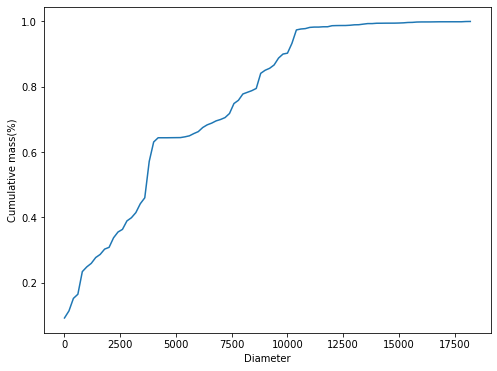

In [441]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.set_yscale('symlog')
#ax.set_ylim(bottom=-0.01, top=max(pdfFalse)+0.001)
#ax.set_ylim(bottom=0.001, top=0.02)
ax.set_ylabel('Cumulative mass(%)')
#ax.set_xscale('symlog')
#ax.set_xlim(left=0.2, right=3.5)
ax.set_xlabel('Diameter')

plt.plot(bins_start,cdfFalse)
plt.show()

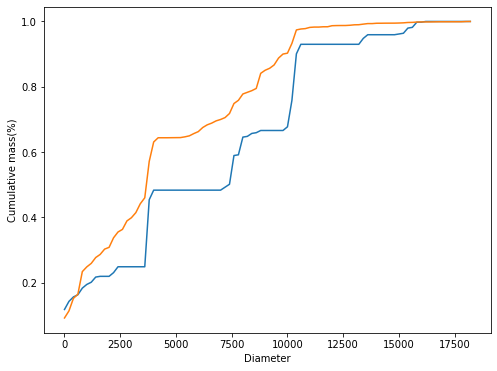

In [442]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.set_yscale('symlog')
#ax.set_ylim(bottom=0.001, top=max(pdfTrue)+0.001)
#ax.set_ylim(bottom=0.001, top=0.02)
ax.set_ylabel('Cumulative mass(%)')
#ax.set_xscale('symlog')
#ax.set_xlim(left=0.2, right=3.5)
ax.set_xlabel('Diameter')

plt.plot(bins_start,cdfTrue)
plt.plot(bins_start,cdfFalse)
plt.show()

In [446]:
# Visulizacao - Mapa
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [448]:
sigma = 0.3
lats['latitude'] = lats['subdomain_ip_latitude'].apply(lambda x: np.random.normal(x, sigma, 1))
lats['longitude'] = lats['subdomain_ip_longitude'].apply(lambda x: np.random.normal(x, sigma, 1))

/home/joaomcouto/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


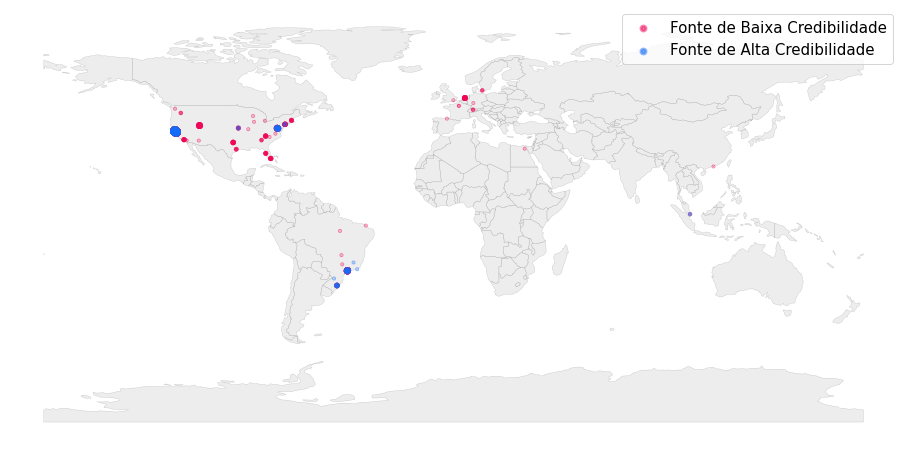

In [450]:
geometry = [Point(xy) for xy in zip(lats['subdomain_ip_longitude'], lats['subdomain_ip_latitude'])]
gdf = GeoDataFrame(lats, geometry=geometry)   

import matplotlib
# set font size
matplotlib.rcParams['font.size'] = 15

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(16, 8), alpha = 0.4, color="lightgray", edgecolor="grey", linewidth=0.4)

unique_lat_longs = list(set([str(point) for point in gdf['geometry']]))
counter_lat_longs = {}
for point in gdf['geometry']:
    try:
        counter_lat_longs[str(point)] += 1
    except:
        counter_lat_longs[str(point)] = 1

count = []
for point in gdf['geometry']:
    count.append(counter_lat_longs[str(point)])
        
gdf['size'] = [c%90 for c in count]
gdf[gdf['desinformacao_label'] == 1].plot(ax= ax, marker='o', alpha=0.5, lw=3, color='#F00758', markersize ="size", label='Fonte de Baixa Credibilidade')
gdf[gdf['desinformacao_label'] == 0].plot(ax= ax, marker='o', alpha=0.5, lw=3, color='#126DFA', markersize ="size", label='Fonte de Alta Credibilidade')
ax.axis("off")
plt.axis('equal')
plt.legend()
plt.show()

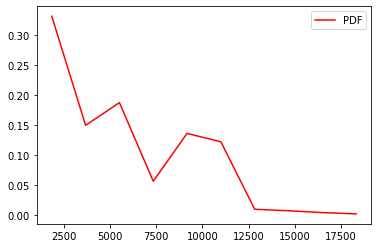

In [443]:
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
  
# No of Data points
N = 500
  
# initializing random values
data = np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(distancesFalse, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
#plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [ ]:
#mapa com coords DONE

In [ ]:
#pdf ?

In [ ]:
#distancias entre as true e false

In [294]:
bins_count[1:]

array([ 1832.83862079,  3665.67724158,  5498.51586237,  7331.35448316,
        9164.19310395, 10997.03172474, 12829.87034553, 14662.70896632,
       16495.5475871 , 18328.38620789])

array([    0.        ,  1832.83862079,  3665.67724158,  5498.51586237,
        7331.35448316,  9164.19310395, 10997.03172474, 12829.87034553,
       14662.70896632, 16495.5475871 , 18328.38620789])

In [178]:
print (geopy.distance.distance((31,30), (30,30)).km)

110.86092556607933


In [ ]:
# dfSourceFeatures['desinformacao_label']= dfSourceFeatures['desinformacao_label'].astype('bool')
# #dfSourceFeatures['url']= dfSourceFeatures['url'].astype('')

# #dfSourceFeatures['subdomain_ip']= dfSourceFeatures['subdomain_ip'].astype('')
# dfSourceFeatures['subdomain_ip_cc']= dfSourceFeatures['subdomain_ip_cc'].astype('category')
# dfSourceFeatures['subdomain_ip_is_brazil']= dfSourceFeatures['subdomain_ip_is_brazil'].astype('bool')
# dfSourceFeatures['subdomain_ip_is_us']= dfSourceFeatures['subdomain_ip_is_us'].astype('bool')
# dfSourceFeatures['subdomain_ip_latitude']= dfSourceFeatures['subdomain_ip_latitude'].astype('float')
# dfSourceFeatures['subdomain_ip_longitude']= dfSourceFeatures['subdomain_ip_longitude'].astype('float')
# #dfSourceFeatures['subdomain_as_n']= dfSourceFeatures['subdomain_as_n'].astype('')
# dfSourceFeatures['subdomain_as_cc']= dfSourceFeatures['subdomain_as_cc'].astype('category')
# dfSourceFeatures['subdomain_ipcc_equal_ascc']= dfSourceFeatures['subdomain_ipcc_equal_ascc'].astype('bool')
# dfSourceFeatures['domain_route_hops']= dfSourceFeatures['domain_route_hops'].astype('int')
# dfSourceFeatures['domain_dns_caa_txt_count']= dfSourceFeatures['domain_dns_caa_txt_count'].astype('int')

In [ ]:
# #dfSubdomainSourceFeatures['subdomain']= dfSubdomainSourceFeatures['subdomain'].astype('')

# #dfSubdomainSourceFeatures['subdomain_ip']= dfSubdomainSourceFeatures['subdomain_ip'].astype('')
# dfSubdomainSourceFeatures['subdomain_ip_cc']= dfSubdomainSourceFeatures['subdomain_ip_cc'].astype('category')
# dfSubdomainSourceFeatures['subdomain_ip_is_brazil']= dfSubdomainSourceFeatures['subdomain_ip_is_brazil'].astype('bool')
# dfSubdomainSourceFeatures['subdomain_ip_is_us']= dfSubdomainSourceFeatures['subdomain_ip_is_us'].astype('bool')
# dfSubdomainSourceFeatures['subdomain_ip_latitude']= dfSubdomainSourceFeatures['subdomain_ip_latitude'].astype('float')
# dfSubdomainSourceFeatures['subdomain_ip_longitude']= dfSubdomainSourceFeatures['subdomain_ip_longitude'].astype('float')
# #dfSubdomainSourceFeatures['subdomain_as_n']= dfSubdomainSourceFeatures['subdomain_as_n'].astype('')
# dfSubdomainSourceFeatures['subdomain_as_cc']= dfSubdomainSourceFeatures['subdomain_as_cc'].astype('category')
# dfSubdomainSourceFeatures['subdomain_ipcc_equal_ascc']= dfSubdomainSourceFeatures['subdomain_ipcc_equal_ascc'].astype('bool')
# dfSubdomainSourceFeatures['domain_route_hops']= dfSubdomainSourceFeatures['domain_route_hops'].astype('int')
# dfSubdomainSourceFeatures['domain_dns_caa_txt_count']= dfSubdomainSourceFeatures['domain_dns_caa_txt_count'].astype('int')



In [ ]:
dfSubdomainSourceFeatures = pd.read_pickle('dfSubdomainSourceFeatures28Aug2021.pkl')

In [ ]:
dfSubdomainSourceFeatures.sample(n=10).head(40)

In [ ]:
dataframe_summary(dfSubdomainSourceFeatures)
dfSubdomainSourceFeatures.head(5)

In [ ]:
dfSubdomainSourceFeatures.sample(n=10).head(40).sort_values('url')

In [ ]:
#Calcula para cada valor de cada feature alguns stats de interesse
valuesDict = dict()
for col in list(dfSubdomainSourceFeatures.columns.values):
    valuesDict[col] = dict()
    uniqueValues = sorted(list(set(dfSubdomainSourceFeatures[col].values)))
    for value in uniqueValues:
        matchedRows = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures[col] == value]
        #Objeto de interesse
        valuesDict[col][value] = dict()
        valuesDict[col][value]['false_count'] = len(matchedRows[matchedRows['desinformacao_label']==1])
        valuesDict[col][value]['true_count'] = len(matchedRows[matchedRows['desinformacao_label']==0])
        valuesDict[col][value]['has_true_and_false'] = valuesDict[col][value]['false_count']>0 and valuesDict[col][value]['true_count']>0
        if valuesDict[col][value]['has_true_and_false'] == 1:
            valuesDict[col][value]['false_proportion'] = valuesDict[col][value]['false_count']/(valuesDict[col][value]['false_count'] + valuesDict[col][value]['true_count'])
        else:
            valuesDict[col][value]['false_proportion'] = 0
            

In [ ]:
valuesDict

In [ ]:
#Pegar todos os stats dos valores em uma coluna tem um valor especifico em uma estatistica especifica 
#Exemplo: pegar as estatisticas dos ips que tem subdominios tanto true quanto false (aka columnOfInterest][value][statOfInterest] == valueOfInterest)
def fetchValueStats(columnOfInterest,statOfInterest,valueOfInterest):
    results = dict()
    for value in list(valuesDict[columnOfInterest].keys()):
        if valuesDict[columnOfInterest][value][statOfInterest] == valueOfInterest:
            results[value] = valuesDict[columnOfInterest][value]

    return results

#def fetchInstancesThatHave
        
#def()

resultsInstances = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures[columnOfInterest].isin(list(results.keys()))]
    
        

In [ ]:
columnOfInterest = 'subdomain_ip'
statOfInterest = 'has_true_and_false'
valueOfInterest = True

a = fetchValueStats(columnOfInterest,statOfInterest,valueOfInterest)

In [ ]:
resultsInstances = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures[columnOfInterest].isin(list(a.keys()))]

In [ ]:
resultsInstances

In [ ]:
a

In [ ]:
resultsInstances.sort_values(columnOfInterest)

In [ ]:
colsDict = dict()
for col in list(dfSubdomainSourceFeatures.columns.values):
    colsDict[col] = dict()
    colsDict[col]['mode'] = dfSubdomainSourceFeatures[col].value_counts().idxmax()
    colsDict[col]['mode_true'] = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label']==0][col].value_counts().idxmax()
    colsDict[col]['mode_false'] = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label']==1][col].value_counts().idxmax()
    try:
        colsDict[col]['mean'] = dfSubdomainSourceFeatures[col].mean()
        colsDict[col]['mean_true'] = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label']==0][col].mean()
        colsDict[col]['mean_false'] = dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label']==1][col].mean()
    except:
        colsDict[col]['mean'] = np.nan
        colsDict[col]['mean_true'] = np.nan
        colsDict[col]['mean_false'] = np.nan
    

In [ ]:
colsDict

In [ ]:
dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['subdomain']=='www.correiodopovo.com.br']

sandbox de EDA, ignorem

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(dfSourceFeatures)

In [ ]:
dfSubdomainSourceFeatures.describe()

In [ ]:
dfSubdomainSourceFeatures.count()

In [ ]:
dfSourceFeatures.info()

In [ ]:
dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label'] == 1]['domain_dns_caa_txt_count'].mean()

In [ ]:
aCategorical = [
                   'subdomain_ip', 'subdomain_ip_cc',
                   'subdomain_as_n','subdomain_as_cc',
                 ]

In [ ]:
aNumerical = [
'subdomain_ip_is_brazil','subdomain_ip_is_us',
                   'subdomain_ip_latitude','subdomain_ip_longitude',
           
                   'subdomain_ipcc_equal_ascc',
                   'domain_route_hops','domain_dns_caa_txt_count'
                 ]
for feature in aNumerical:
    print("Feature:", feature)
    print("Media true:")
    print(dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label'] == 0][feature].mean())
    print("Media false:")
    print(dfSubdomainSourceFeatures[dfSubdomainSourceFeatures['desinformacao_label'] == 1][feature].mean())
    print("\n")

In [ ]:
# allSubs = []
# for index, row in dfUrlTrue.iterrows():
#     url = row['url']
#     dissectedUrl = tldextract.extract(url)
#     subdomain = '.'.join(part for part in dissectedUrl if len(part)>0)
#     allSubs.append(subdomain)
#     #print(len(allSubs))
# print(len(list(set(allSubs))))

# allSubs = []
# for index, row in dfUrlFalse.iterrows():
#     url = row['url']
#     dissectedUrl = tldextract.extract(url)
#     subdomain = '.'.join(part for part in dissectedUrl if len(part)>0)
#     allSubs.append(subdomain)
#     #print(len(allSubs))
# print(len(list(set(allSubs))))

# #Tem 108 sites true
# #292 sites fake

In [ ]:
# def lendo_dataset(localizacao_arquivo):
#     # Leitura de dados:
#     dados = []
#     with open(localizacao_arquivo, mode='r') as f:
#         for line in f:
#             dados.append(json.loads(line.strip()))

#     # Imprimindo primeiro 3 coletas de cada
#     for i in range(3):
#         pp = pprint.PrettyPrinter(indent=4)
#         pp.pprint(dados[i])
#         print('\n')


# # Lendo TrueNews
# print('\n---------------TRUE NEWS:\n')
# lendo_dataset('data/DATASET_MPMG-TrueNews_selected.txt')

# print('\n\n\n---------------FAKE NEWS:\n')
# # Lendo FakeNews
# lendo_dataset('data/DATASET_MPMG-FakeNews_matched.txt')
# dfTrue = pd.read_json('data/DATASET_MPMG-TrueNews_selected.json')
# dfFalse = pd.read_json('data/DATASET_MPMG-FakeNews_matched.json')
# print(dfTrue.columns)

# dfTrue.replace('', np.nan, inplace=True)
# dfFalse.replace('', np.nan, inplace=True)
# dfTrue.replace('NULL', np.nan, inplace=True)
# dfFalse.replace('NULL', np.nan, inplace=True)
#print(dfTrue.shape, dfFalse.shape)